**Please don't edit this cell!**

# Marks and Feedback

**Total Marks:**   100/100

**Overall comments:**


## Part 1. Investigations into Neural Networks (35 marks)


good, thorough set of experiments

* **Task 1**:   *Experiments with learning rate schedules* - 5/5
    * learning rate schedulers implemented
    * experiments carried out
    * further comments
    good

* **Task 2**:   *Experiments with regularisation* - 5/5
    * L1 experiments
    * L2 experiments
    * dropout experiments
    * annealed dropout implmented
    * further experiments carried out
    * further comments
    good

* **Task 3**:   *Experiments with pretraining* - 15/15
    * autoencoder pretraining implemented
    * denoising autoencoder pretraining implemented
    * CE layer-by-layer pretraining implemented
    * experiments
    * further comments
    good

* **Task 4**:   *Experiments with data augmentation* - 5/5
    * training data augmneted using noise, rotation, ...
    * any further augmnetations
    * experiments 
    * further comments
    very good

* **Task 5**:   *State of the art* - 5/5
    * motivation for systems constructed
    * experiments
    * accuracy of best system
    * further comments
    excellent - very accuate system


## Part 2. Convolutional Neural Networks (55 marks)

* **Task 6**:   *Implement convolutional layer* - 20/20
    * linear conv layer
    * sigmoid conv layer
    * relu conv layer
    * any checks for correctness
    * loop-based or vectorised implementations
    * timing comparisons


* **Task 7**:   *Implement maxpooling layer* - 10/10
    * implementation of non-overlapping pooling
    * generic implementation
    * any checks for correctness


* **Task 8**:   *Experiments with convolutional networks* - 25/25
    * 1 conv layer (1 fmap)
    * 1 conv layer (5 fmaps)
    * 2 conv layers
    * further experiments
    very good experiments


## Presentation (10 marks)

* ** Marks:**   10/10
    * Concise description of each system constructed
    * Experiment design and motivations for different systems
    * Presentation of results - graphs, tables, diagrams
    * Conclusions



# Coursework #2

## Introduction


## Previous Tutorials

Before starting this coursework make sure that you have completed the following labs:

* [04_Regularisation.ipynb](https://github.com/CSTR-Edinburgh/mlpractical/blob/master/04_Regularisation.ipynb) - regularising the model
* [05_Transfer_functions.ipynb](https://github.com/CSTR-Edinburgh/mlpractical/blob/master/05_Transfer_functions.ipynb) - building and training different activation functions
* [06_MLP_Coursework2_Introduction.ipynb](https://github.com/CSTR-Edinburgh/mlpractical/blob/master/06_MLP_Coursework2_Introduction.ipynb) - Notes on numpy and tensors


## Submission
**Submission Deadline:  Thursday 14 January 2016, 16:00** 

Submit the coursework as an ipython notebook file, using the `submit` command in the terminal on a DICE machine. If your file is `06_MLP_Coursework1.ipynb` then you would enter:

`submit mlp 2 06_MLP_Coursework1.ipynb` 

where `mlp 2` indicates this is the second coursework of MLP.

After submitting, you should receive an email of acknowledgment from the system confirming that your submission has been received successfully. Keep the email as evidence of your coursework submission.

**Please make sure you submit a single `ipynb` file (and nothing else)!**

**Submission Deadline:  Thursday 14 January 2016, 16:00** 



## Getting Started
Please enter your student number and the date in the next code cell.

In [1]:
#MLP Coursework 2
#Student number: 
#Date: 06/12/2015

# Part 1. Investigations into Neural Networks (35 marks)

In this part you are may choose exactly what you implement. However, you are expected to express your motivations, observations, and findings in a clear and cohesive way. Try to make it clear why you decided to do certain things. Use graphs and/or tables of results to show trends and other characteristics you think are important. 

For example, in Task 1 you could experiment with different schedulers in order to compare their convergence properties. In Task 2 you could look into (and visualise) what happens to weights when applying L1 and/or L2 regularisation when training. For instance, you could create sorted histograms of weight magnitudes in in each layer, etc..

**Before submission, please collapse all the log entries into smaller boxes (by clicking on the bar on the left hand side)**

### Task 1 - Experiments with learning rate schedules (5 marks)

Investigate the effect of learning rate schedules on training and accuracy.  Implement at least one additional learning rate scheduler mentioned in the lectures. 

* attached code

In [ ]:
# %load -s LearningRateExponential mlp/schedulers.py
class LearningRateExponential(LearningRateScheduler):
    """ Exponential learning rate schedule"""
    def __init__(self, start_rate, max_epochs, tr_size):
        assert start_rate > 0, (
            "learning rate expected to be > 0, got %f" % learning_rate
        )
        super(LearningRateExponential, self).__init__(max_epochs)
        self.start_rate = start_rate
        self.rate = start_rate
        self.tr_size = tr_size
    
    def get_rate(self):
        if self.epoch < self.max_epochs:
            return self.rate
        return 0.0
    
    def get_next_rate(self, current_accuracy = None):
        self.rate = self.start_rate*numpy.exp(-float(self.epoch))
        self.epoch += 1
        return self.rate


In [ ]:
# %load -s LearningRateReciprocal mlp/schedulers.py
class LearningRateReciprocal(LearningRateScheduler):
    """Reciprocal learning rate scheduler"""
    def __init__(self, start_rate, max_epochs, tr_size, c=1):
        assert start_rate > 0, (
            "learning rate expected to be > 0, got %f" % learning_rate
        )
        super(LearningRateReciprocal, self).__init__(max_epochs)
        self.start_rate = start_rate
        self.rate = start_rate
        self.tr_size = tr_size
        self.c = c
        
    def get_rate(self):
        if self.epoch < self.max_epochs:
            return self.rate
        return 0.0
    
    def get_next_rate(self, current_accuracy = None):
        self.rate = self.start_rate*((1 + float(self.epoch))**(-self.c))
        self.epoch += 1
        return self.rate


* Experiments

INFO:root:Initialising data providers...
INFO:root:Stacking hidden layer (2)
INFO:root:Training started...
INFO:mlp.optimisers:Epoch 0: Training cost (ce) for initial model is 2.368. Accuracy is 12.50%
INFO:mlp.optimisers:Epoch 0: Validation cost (ce) for initial model is 2.373. Accuracy is 10.21%
INFO:mlp.optimisers:Epoch 1: Training cost (ce) is 2.360. Accuracy is 22.20%
INFO:mlp.optimisers:Epoch 1: Validation cost (ce) is 1.646. Accuracy is 44.53%
INFO:mlp.optimisers:Epoch 1: Took 1 seconds. Training speed 4171 pps. Validation speed 30306 pps.
INFO:mlp.optimisers:Epoch 2: Training cost (ce) is 1.154. Accuracy is 59.20%
INFO:mlp.optimisers:Epoch 2: Validation cost (ce) is 0.791. Accuracy is 74.48%
INFO:mlp.optimisers:Epoch 2: Took 1 seconds. Training speed 4004 pps. Validation speed 29415 pps.
INFO:mlp.optimisers:Epoch 3: Training cost (ce) is 0.695. Accuracy is 75.80%
INFO:mlp.optimisers:Epoch 3: Validation cost (ce) is 0.645. Accuracy is 78.18%
INFO:mlp.optimisers:Epoch 3: Took 1 s

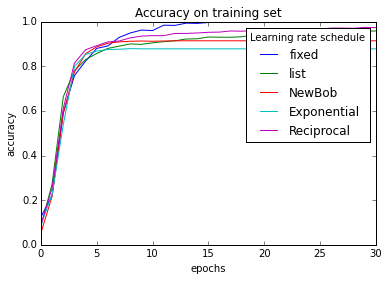

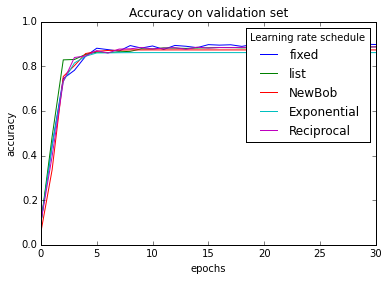

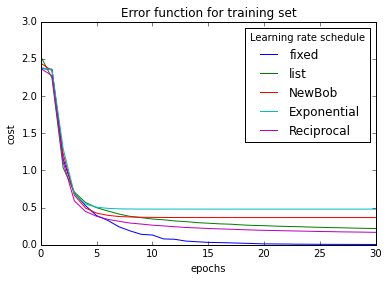

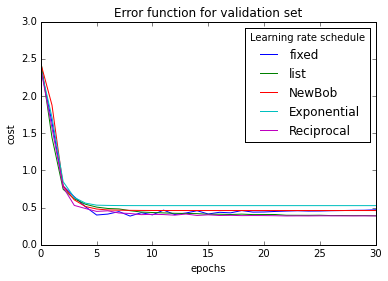

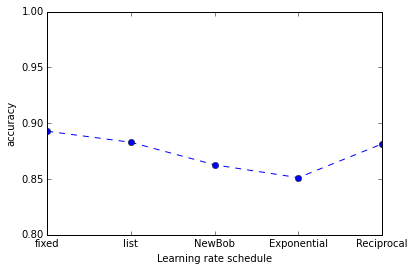

In [3]:
#Experiments on learning rate schedules
%matplotlib inline
import numpy
import pylab as pl
import logging
from mlp.dataset import MNISTDataProvider

from mlp.layers import MLP, Linear, Sigmoid, Softmax #import required layer types
from mlp.optimisers import SGDOptimiser #import the optimiser

from mlp.costs import CECost #import the cost we want to use for optimisation
import mlp.schedulers as sd
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.info('Initialising data providers...')

train_dp = MNISTDataProvider(dset='train', batch_size=10, max_num_batches=100, randomize=True)
valid_dp = MNISTDataProvider(dset='valid', batch_size=10000, max_num_batches=-10, randomize=False)
test_dp = MNISTDataProvider(dset='eval', batch_size=10000, max_num_batches=-10, randomize=False)

rng = numpy.random.RandomState([2015,10,10])

#some hyper-parameters
nhid = 200
learning_rates_list = list(0.5/numpy.array(range(1,31)))     # learning rate list
learning_rate = 0.5                                    # fixed learning rate or start rate
max_epochs = 30
cost = CECost()
num_layer = 2
lr_schedulers = [sd.LearningRateFixed(learning_rate=learning_rate, max_epochs=max_epochs),
                 sd.LearningRateList(learning_rates_list=learning_rates_list, max_epochs=max_epochs),
                 sd.LearningRateNewBob(start_rate=learning_rate, max_epochs=max_epochs, patience=50),
                 sd.LearningRateExponential(start_rate=learning_rate, max_epochs=max_epochs, tr_size=1000),
                 sd.LearningRateReciprocal(start_rate=learning_rate, max_epochs=max_epochs, tr_size=1000)]
y_t = []
y_v = []
ac_test=[]
i = 0
for scheduler in lr_schedulers:

    train_dp.reset()
    valid_dp.reset()
    test_dp.reset()
    
    #define the model
    model = MLP(cost=cost)
    model.add_layer(Sigmoid(idim=784, odim=nhid, irange=0.2, rng=rng))   
    for ii in xrange(1, num_layer):
        logger.info("Stacking hidden layer (%s)" % str(ii+1))
        model.add_layer(Sigmoid(idim=nhid, odim=nhid, irange=0.2, rng=rng))
    model.add_layer(Softmax(idim=nhid, odim=10, rng=rng))

    # define the optimiser, here stochasitc gradient descent
    # with fixed learning rate and max_epochs
    lr_scheduler = scheduler
    
    optimiser = SGDOptimiser(lr_scheduler=lr_scheduler)

    logger.info('Training started...')
    tr_stats, valid_stats = optimiser.train(model, train_dp, valid_dp)

    logger.info('Testing the model on test set:')
    tst_cost, tst_accuracy = optimiser.validate(model, test_dp)
    logger.info('MNIST test set accuracy is %.2f %%, cost (%s) is %.3f'%(tst_accuracy*100., cost.get_name(), tst_cost))
    
    ac_test.append(tst_accuracy)  
    
    y_t.append([])            # Append an empty list for storing cost and accuracy of each training epoch
    y_t[i].append([])
    y_t[i].append([])
    y_v.append([])            # Append an empty list for storing cost and accuracy of validation for each epoch
    y_v[i].append([])
    y_v[i].append([])
    for j in range(0,max_epochs+1):
        y_t[i][0].append(tr_stats[j][0])       # get cost in each epoch
        y_v[i][0].append(valid_stats[j][0])
        
        y_t[i][1].append(tr_stats[j][1])       # get accuracy in each epoch
        y_v[i][1].append(valid_stats[j][1])
    
    i+=1



x = range(0,max_epochs+1)
legends = ['fixed','list','NewBob','Exponential','Reciprocal']

# Plot value of the accuracy for training sets as a function of training epochs for each model
pl.figure(1)
for i in range(len(lr_schedulers)):
    pl.plot(x, y_t[i][1], linestyle="-", label = legends[i] )
    pl.title('Accuracy on training set')
    pl.xlabel('epochs')
    pl.ylabel('accuracy')
    pl.xlim(0,max_epochs)
    pl.ylim(0.0,1.0)
    pl.legend(title = 'Learning rate schedule')

# Plot value of the accuracy for validation sets as a function of training epochs for each model
pl.figure(2)
for i in range(len(lr_schedulers)):
    pl.plot(x, y_v[i][1], linestyle="-", label = legends[i] )
    pl.title('Accuracy on validation set')
    pl.xlabel('epochs')
    pl.ylabel('accuracy')
    pl.xlim(0,max_epochs)
    pl.ylim(0.0,1.0)
    pl.legend(title = 'Learning rate schedule')

# Plot value of the error function for training sets as a function of training epochs for each model
pl.figure(3)
for i in range(len(lr_schedulers)):
    pl.plot(x, y_t[i][0], linestyle="-", label = legends[i] )
    pl.title('Error function for training set')
    pl.xlabel('epochs')
    pl.ylabel('cost')
    pl.xlim(0,max_epochs)
    pl.ylim(0.0,3.0)
    pl.legend(title = 'Learning rate schedule')

# Plot value of the error function for validation sets as a function of training epochs for each model
pl.figure(4)
for i in range(len(lr_schedulers)):
    pl.plot(x, y_v[i][0], linestyle="-", label = legends[i] )
    pl.title('Error function for validation set')
    pl.xlabel('epochs')
    pl.ylabel('cost')
    pl.xlim(0,max_epochs)
    pl.ylim(0.0,3.0)
    pl.legend(title = 'Learning rate schedule')

# Plot the test set classification accuracy against learning rate schedulers
pl.figure(5)
x=range(len(lr_schedulers))
pl.plot(x, ac_test, 'bo--')
pl.xlabel('Learning rate schedule')
pl.title('Accuracy on test set using different Learning rate schedule')
pl.ylabel('accuracy')
pl.xticks([0,1,2,3,4],['fixed','list','NewBob','Exponential','Reciprocal'])
pl.ylim(0.8,1.0)

pl.show()

**discussion**: In task1, I implement two additional learning rate schedules mentioned in lecture -- exponential and reciprocal. These two sechedules are implemented as classes in schedulers.py. As for piecewise constant schedule, it can be implemented in the LearningRateList class in schedulers.py. I pre-determine an arithmetic sequence starting with 0.5 for this schedule.

Through a one hidden layer neural network with 200 hiden unites (it saves time more than using 800 hidden units), we compared 5 different learning rate schedules, including fixed rate of 0.5, pre-determined rate, new bob, exponential and reciprocal schedules all with start rate of 0.5. The results are showed in above graphs.

The accuaracy and cost on validation set show not much difference among schedules. From the graph of training set, it can be seen that the exponential schedule performs worst with lowest accuracy and highest value of error function on training set. It also has the lowest accuracy on test set. And the pre-determined rate performs bad as well. Obviously, the result is highly related to the setted rate. In this case we can only depend on the rule of thumb. 

The performance of model using NewBob schedule is not good. But this shcedule has many parameters that can be set, I just used the default one. We can explore the best combination in further experiments to get higher accuracy.

The accuracy on test set using fixed rate is the highest than using reciprocal rate. It convergence fast on training set, but experience fluctuation. However different fixed learning rate and start rate has different results. The results are more unstable when using different fixed learning rate. I tried to use ideal fixed learning rate in later experiments.

In [24]:
# further experiments on learning rate schedule through deep networks.
%matplotlib inline
import numpy
import pylab as pl
import logging
from mlp.dataset import MNISTDataProvider

from mlp.layers import MLP, Linear, Sigmoid, Softmax #import required layer types
from mlp.optimisers import SGDOptimiser #import the optimiser

from mlp.costs import CECost #import the cost we want to use for optimisation
import mlp.schedulers as sd
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.info('Initialising data providers...')

train_dp = MNISTDataProvider(dset='train', batch_size=10, max_num_batches=100, randomize=True)
valid_dp = MNISTDataProvider(dset='valid', batch_size=10000, max_num_batches=-10, randomize=False)
test_dp = MNISTDataProvider(dset='eval', batch_size=10000, max_num_batches=-10, randomize=False)

rng = numpy.random.RandomState([2015,10,10])

#some hyper-parameters
nhid = 200
learning_rates_list = list(0.5/numpy.array(range(1,31)))     # learning rate list
learning_rate = 0.5                                    # fixed learning rate or start rate
max_epochs = 30
cost = CECost()
num_layer = 5

lr_schedulers = [sd.LearningRateFixed(learning_rate=learning_rate, max_epochs=max_epochs),
                 sd.LearningRateList(learning_rates_list=learning_rates_list, max_epochs=max_epochs),
                 sd.LearningRateNewBob(start_rate=learning_rate, max_epochs=max_epochs, patience=50),
                 sd.LearningRateExponential(start_rate=learning_rate, max_epochs=max_epochs, tr_size=1000),
                 sd.LearningRateReciprocal(start_rate=learning_rate, max_epochs=max_epochs, tr_size=1000)]
y_t = []
y_v = []
ac_test=[]
i = 0
for scheduler in lr_schedulers:

    train_dp.reset()
    valid_dp.reset()
    test_dp.reset()
    
    #define the model
    model = MLP(cost=cost)
    model.add_layer(Sigmoid(idim=784, odim=nhid, irange=0.2, rng=rng))   
    for ii in xrange(1, num_layer):
        logger.info("Stacking hidden layer (%s)" % str(ii+1))
        model.add_layer(Sigmoid(idim=nhid, odim=nhid, irange=0.2, rng=rng))
    model.add_layer(Softmax(idim=nhid, odim=10, rng=rng))

    # define the optimiser, here stochasitc gradient descent
    # with fixed learning rate and max_epochs
    lr_scheduler = scheduler
    
    optimiser = SGDOptimiser(lr_scheduler=lr_scheduler)

    logger.info('Training started...')
    tr_stats, valid_stats = optimiser.train(model, train_dp, valid_dp)

    logger.info('Testing the model on test set:')
    tst_cost, tst_accuracy = optimiser.validate(model, test_dp)
    logger.info('MNIST test set accuracy is %.2f %%, cost (%s) is %.3f'%(tst_accuracy*100., cost.get_name(), tst_cost))
    
    ac_test.append(tst_accuracy)  
    
    y_t.append([])            # Append an empty list for storing cost and accuracy of each training epoch
    y_t[i].append([])
    y_t[i].append([])
    y_v.append([])            # Append an empty list for storing cost and accuracy of validation for each epoch
    y_v[i].append([])
    y_v[i].append([])
    for j in range(0,max_epochs+1):
        y_t[i][0].append(tr_stats[j][0])       # get cost in each epoch
        y_v[i][0].append(valid_stats[j][0])
        
        y_t[i][1].append(tr_stats[j][1])       # get accuracy in each epoch
        y_v[i][1].append(valid_stats[j][1])
    
    i+=1

import cPickle
with open('lrscheduler2.pkl','wb') as f:
    cPickle.dump([ac_test,y_t,y_v], f)


INFO:root:Initialising data providers...
INFO:root:Stacking hidden layer (2)
INFO:root:Stacking hidden layer (3)
INFO:root:Stacking hidden layer (4)
INFO:root:Stacking hidden layer (5)
INFO:root:Training started...
INFO:mlp.optimisers:Epoch 0: Training cost (ce) for initial model is 2.335. Accuracy is 9.10%
INFO:mlp.optimisers:Epoch 0: Validation cost (ce) for initial model is 2.342. Accuracy is 10.09%
INFO:mlp.optimisers:Epoch 1: Training cost (ce) is 2.549. Accuracy is 7.90%
INFO:mlp.optimisers:Epoch 1: Validation cost (ce) is 2.315. Accuracy is 9.90%
INFO:mlp.optimisers:Epoch 1: Took 1 seconds. Training speed 2502 pps. Validation speed 21741 pps.
INFO:mlp.optimisers:Epoch 2: Training cost (ce) is 2.318. Accuracy is 9.70%
INFO:mlp.optimisers:Epoch 2: Validation cost (ce) is 2.308. Accuracy is 9.90%
INFO:mlp.optimisers:Epoch 2: Took 1 seconds. Training speed 2634 pps. Validation speed 21741 pps.
INFO:mlp.optimisers:Epoch 3: Training cost (ce) is 2.313. Accuracy is 10.90%
INFO:mlp.opti

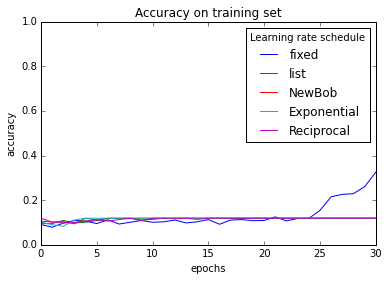

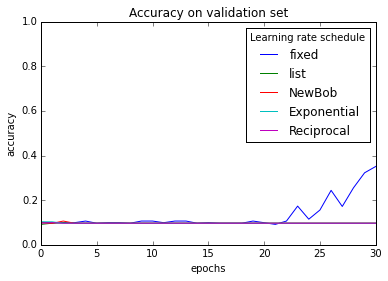

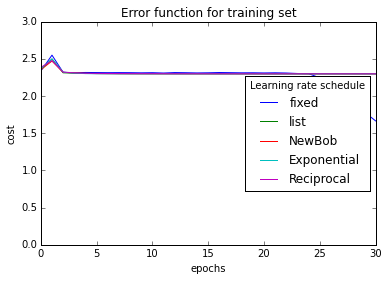

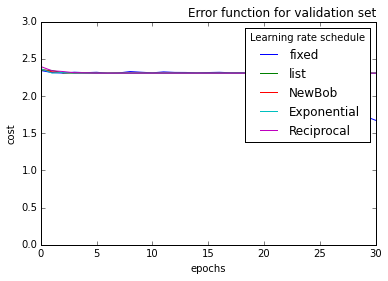

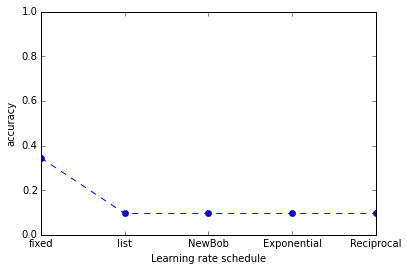

In [25]:
import cPickle
with open('lrscheduler2.pkl','r') as f:
    ac_test,y_t,y_v = cPickle.load(f)

max_epochs = 30
    
x = range(0,max_epochs+1)
legends = ['fixed','list','NewBob','Exponential','Reciprocal']

# Plot value of the accuracy for training sets as a function of training epochs for each model
pl.figure(1)
for i in range(len(lr_schedulers)):
    pl.plot(x, y_t[i][1], linestyle="-", label = legends[i] )
    pl.title('Accuracy on training set')
    pl.xlabel('epochs')
    pl.ylabel('accuracy')
    pl.xlim(0,max_epochs)
    pl.ylim(0.0,1.0)
    pl.legend(title = 'Learning rate schedule')

# Plot value of the accuracy for validation sets as a function of training epochs for each model
pl.figure(2)
for i in range(len(lr_schedulers)):
    pl.plot(x, y_v[i][1], linestyle="-", label = legends[i] )
    pl.title('Accuracy on validation set')
    pl.xlabel('epochs')
    pl.ylabel('accuracy')
    pl.xlim(0,max_epochs)
    pl.ylim(0.0,1.0)
    pl.legend(title = 'Learning rate schedule')

# Plot value of the error function for training sets as a function of training epochs for each model
pl.figure(3)
for i in range(len(lr_schedulers)):
    pl.plot(x, y_t[i][0], linestyle="-", label = legends[i] )
    pl.title('Error function for training set')
    pl.xlabel('epochs')
    pl.ylabel('cost')
    pl.xlim(0,max_epochs)
    pl.ylim(0.0,3.0)
    pl.legend(title = 'Learning rate schedule',loc='right')

# Plot value of the error function for validation sets as a function of training epochs for each model
pl.figure(4)
for i in range(len(lr_schedulers)):
    pl.plot(x, y_v[i][0], linestyle="-", label = legends[i] )
    pl.title('Error function for validation set', loc='right')
    pl.xlabel('epochs')
    pl.ylabel('cost')
    pl.xlim(0,max_epochs)
    pl.ylim(0.0,3.0)
    pl.legend(title = 'Learning rate schedule')

# Plot the test set classification accuracy against learning rate schedulers
pl.figure(5)
x=range(len(lr_schedulers))
pl.plot(x, ac_test, 'bo--')
pl.xlabel('Learning rate schedule')
pl.ylabel('accuracy')
pl.xticks([0,1,2,3,4],['fixed','list','NewBob','Exponential','Reciprocal'])
pl.ylim(0,1.0)

pl.show()

**Discussion**: This experiments based on a deep neural network (5 hidden layers). It can not reach minimum in 30 epochs because of so many layers. From the result graphs above, it can be seen that the model using fixed learning rate start to be convergent earlier. Other schedules use too small learning rate in last epochs, so their training processes are inefficient and would last long.

### Task 2 - Experiments with regularisers (5 marks)

Investigate the effect of different regularisation approaches (L1, L2, dropout).  Implement the annealing dropout scheduler (mentioned in lecture 5). Do some further investigations and experiments with model structures (and regularisers) of your choice. 

In [52]:
#experiments on l1, l2
import numpy
import pylab as pl
import logging
from mlp.dataset import MNISTDataProvider

from mlp.layers import MLP, Linear, Sigmoid, Softmax #import required layer types
from mlp.optimisers import SGDOptimiser #import the optimiser

from mlp.costs import CECost #import the cost we want to use for optimisation
import mlp.schedulers as sd
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.info('Initialising data providers...')

train_dp = MNISTDataProvider(dset='train', batch_size=10, max_num_batches=200, randomize=True)
valid_dp = MNISTDataProvider(dset='valid', batch_size=10000, max_num_batches=-10, randomize=False)
test_dp = MNISTDataProvider(dset='eval', batch_size=10000, max_num_batches=-10, randomize=False)

rng = numpy.random.RandomState([2015,10,10])

#some hyper-parameters
nhid = 500
learning_rate = 0.02                                    # start rate
max_epochs = 30
l1_weight = [0, 0.00001, 0, 0.00001]
l2_weight = [0, 0, 0.00001, 0.00001]
cost = CECost()

y_t = []      # Accuracy and cost on training set
y_v = []      # Accuracy and cost on validation set
ac_test=[]    # Accuracy on test set
layer = 1
weights1 = numpy.zeros(shape=(4,784,500))   # store weights of first layers
weights2 = numpy.zeros(shape=(4,500,10))    # store weights of seconde layers

for i in xrange(0, 4):

    train_dp.reset()
    valid_dp.reset()
    test_dp.reset()
    
    #define the model
    model = MLP(cost=cost)
    model.add_layer(Sigmoid(idim=784, odim=nhid, irange=0.2, rng=rng))
    for ii in xrange(1, layer):
        logger.info("Stacking hidden layer (%s)" % str(ii+1))
        model.add_layer(Sigmoid(idim=nhid, odim=nhid, irange=0.2, rng=rng))
    model.add_layer(Softmax(idim=nhid, odim=10, rng=rng))

    # define the optimiser, here stochasitc gradient descent
    # with fixed learning rate and max_epochs
    lr_scheduler = sd.LearningRateExponential(start_rate=learning_rate, max_epochs=max_epochs, tr_size=1000)
    optimiser = SGDOptimiser(lr_scheduler=lr_scheduler, 
                             dp_scheduler=None,
                             l1_weight=l1_weight[i], 
                             l2_weight=l2_weight[i])

    logger.info('Training started...')
    tr_stats, valid_stats = optimiser.train(model, train_dp, valid_dp)

    logger.info('Testing the model on test set:')
    tst_cost, tst_accuracy = optimiser.validate(model, test_dp)
    logger.info('MNIST test set accuracy is %.2f %%, cost (%s) is %.3f'%(tst_accuracy*100., cost.get_name(), tst_cost))
    
    ac_test.append(tst_accuracy)
    
    y_t.append([])            # Append an empty list for storing cost and accuracy of each training epoch
    y_t[i].append([])
    y_t[i].append([])
    y_v.append([])            # Append an empty list for storing cost and accuracy of validation for each epoch
    y_v[i].append([])
    y_v[i].append([])
    for j in range(0,max_epochs+1):
        y_t[i][0].append(tr_stats[j][0])       # get cost in each epoch
        y_v[i][0].append(valid_stats[j][0])
        
        y_t[i][1].append(tr_stats[j][1])       # get accuracy in each epoch
        y_v[i][1].append(valid_stats[j][1])
    
    
    
    weights1[i] = model.layers[0].W
    weights2[i] = model.layers[1].W


    


INFO:root:Initialising data providers...
INFO:root:Training started...
INFO:mlp.optimisers:Epoch 0: Training cost (ce) for initial model is 2.493. Accuracy is 8.65%
INFO:mlp.optimisers:Epoch 0: Validation cost (ce) for initial model is 2.489. Accuracy is 8.37%
INFO:mlp.optimisers:Epoch 1: Training cost (ce) is 1.844. Accuracy is 43.70%
INFO:mlp.optimisers:Epoch 1: Validation cost (ce) is 1.372. Accuracy is 68.15%
INFO:mlp.optimisers:Epoch 1: Took 1 seconds. Training speed 1962 pps. Validation speed 27781 pps.
INFO:mlp.optimisers:Epoch 2: Training cost (ce) is 1.185. Accuracy is 73.10%
INFO:mlp.optimisers:Epoch 2: Validation cost (ce) is 0.982. Accuracy is 79.81%
INFO:mlp.optimisers:Epoch 2: Took 1 seconds. Training speed 1924 pps. Validation speed 27781 pps.
INFO:mlp.optimisers:Epoch 3: Training cost (ce) is 0.898. Accuracy is 79.90%
INFO:mlp.optimisers:Epoch 3: Validation cost (ce) is 0.813. Accuracy is 80.90%
INFO:mlp.optimisers:Epoch 3: Took 1 seconds. Training speed 1943 pps. Valid

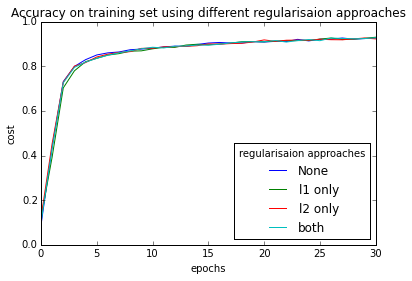

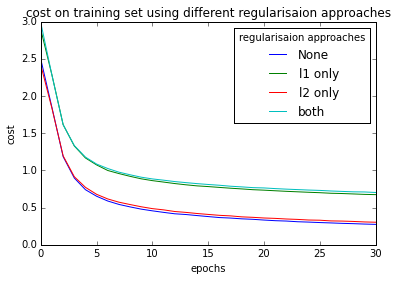

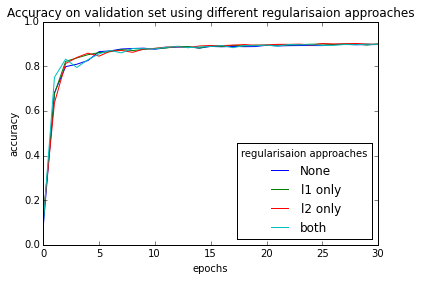

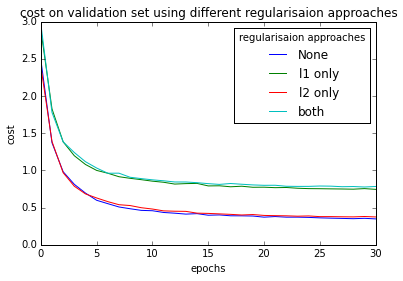

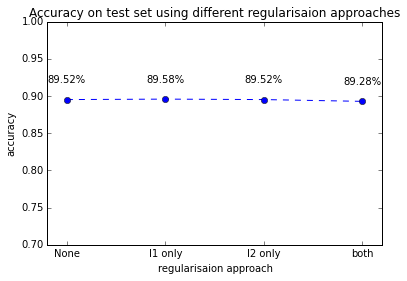

In [53]:
# plot results of experiments on l1, l2
%matplotlib inline
x = range(0,max_epochs+1)
legends = ['None', 'l1 only', 'l2 only', 'both']

# Plot value of the accuracy for training sets as a function of training epochs for each model
pl.figure(1)
for i in range(len(l1_weight)):
    pl.plot(x, y_t[i][1], linestyle="-", label = legends[i] )
    pl.title('Accuracy on training set using different regularisaion approaches')
    pl.xlabel('epochs')
    pl.ylabel('cost')
    pl.xlim(0,max_epochs)
    pl.ylim(0.0,1.0)
    pl.legend(title = 'regularisaion approaches', loc='lower right')

# Plot cost for training sets as a function of training epochs for each model
pl.figure(2)
for i in range(len(l1_weight)):
    pl.plot(x, y_t[i][0], linestyle="-", label = legends[i] )
    pl.title('cost on training set using different regularisaion approaches')
    pl.xlabel('epochs')
    pl.ylabel('cost')
    pl.xlim(0,max_epochs)
    pl.ylim(0.0,3.0)
    pl.legend(title = 'regularisaion approaches', loc='upper right')

# Plot value of the accuracy for validation sets as a function of training epochs for each model
pl.figure(3)
for i in range(len(l1_weight)):
    pl.plot(x, y_v[i][1], linestyle="-", label = legends[i] )
    pl.title('Accuracy on validation set using different regularisaion approaches')
    pl.xlabel('epochs')
    pl.ylabel('accuracy')
    pl.xlim(0,max_epochs)
    pl.ylim(0.0,1.0)
    pl.legend(title = 'regularisaion approaches', loc='lower right')

# Plot value of the cost for validation sets as a function of training epochs for each model
pl.figure(4)
for i in range(len(l1_weight)):
    pl.plot(x, y_v[i][0], linestyle="-", label = legends[i] )
    pl.title('cost on validation set using different regularisaion approaches')
    pl.xlabel('epochs')
    pl.ylabel('cost')
    pl.xlim(0,max_epochs)
    pl.ylim(0.0,3.0)
    pl.legend(title = 'regularisaion approaches', loc='upper right')

# Plot the test set classification accuracy against dropout schedulers
pl.figure(5)
x=range(len(l1_weight))
pl.plot(x, ac_test, 'bo--')
pl.xlabel('regularisaion approach')
pl.ylabel('accuracy')
pl.xticks([0,1,2,3],legends)
pl.ylim(0.7,1.0)
pl.xlim(-0.2, 3.2)
pl.title('Accuracy on test set using different regularisaion approaches')
for i in range(len(l1_weight)):
    pl.text(x[i], ac_test[i]+0.02, str(ac_test[i]*100)+'%', ha='center', va='bottom')
pl.show()

**Discussion**: The result graphs are showed above. 
Using regularisation approaches does not improve the performance of model. Also, using L1 gets more cost on both tarining set and validation set.

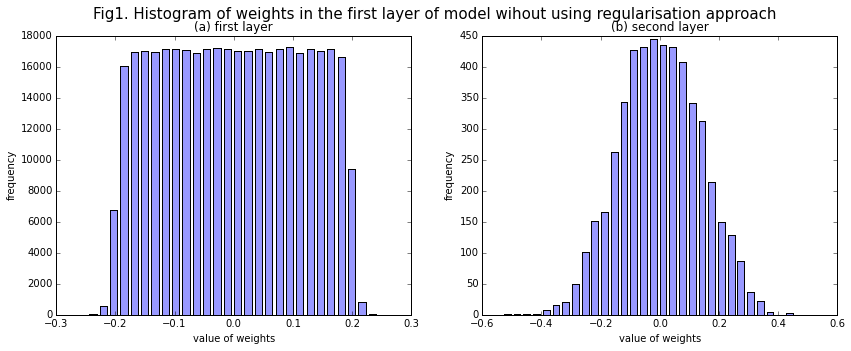

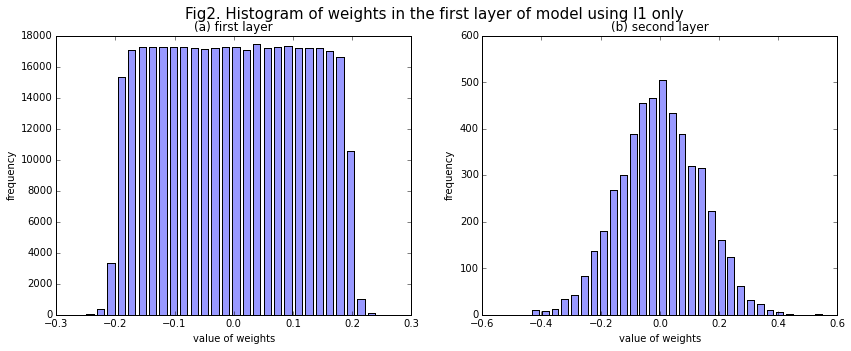

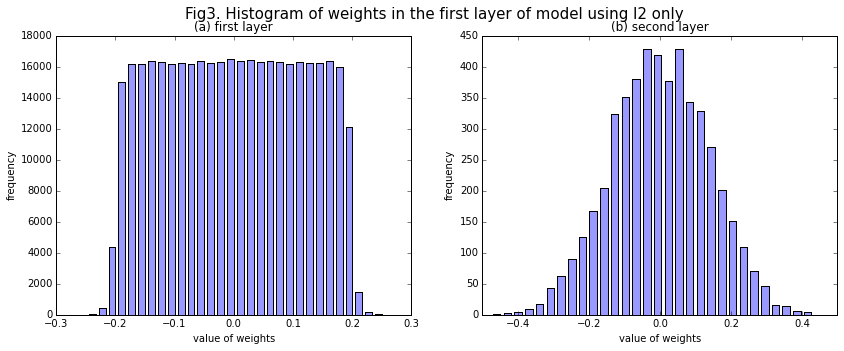

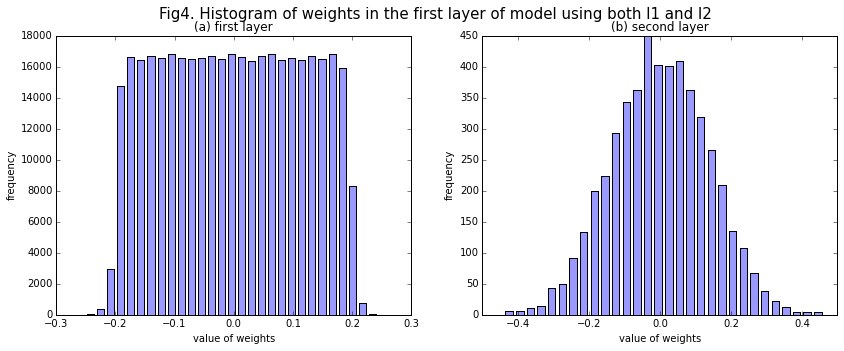

In [49]:
# weights histogram
%matplotlib inline
import matplotlib.pyplot as pl
import numpy as np

tiles = ['wihout using regularisation approach','using l1 only', 'using l2 only', 'using both l1 and l2']
for i in range(4):
    pl.figure(i+1,(14,5))
    pl.suptitle('Fig%s. Histogram of weights in the first layer of model %s'%((i+1),tiles[i]), fontsize=15)

    pl.subplot(121)
    hist, bins = np.histogram(weights1[i], bins=30)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    pl.bar(center, hist, align='center', width=width, facecolor='#9999ff')
    pl.xlabel('value of weights')
    pl.ylabel('frequency')
    pl.title('(a) first layer')

    pl.subplot(122)
    hist, bins = np.histogram(weights2[i], bins=30)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    pl.bar(center, hist, align='center', width=width, facecolor='#9999ff')
    pl.xlabel('value of weights')
    pl.ylabel('frequency')
    pl.title('(b) second layer')


pl.show()

**Discussion:** The histogram of weights in model using different regularisation approaches are showed above.
It can be seen that after using L1 much more weights are shrinked to around 0.0, and some weights are shrinked to 0.0. After using L2 most weights become smaller, concentrate to 0.0. 

* Attach annealing dropout scheduler code in below cell.

In [ ]:
# %load -s DropoutAnnealed mlp/schedulers.py
class DropoutAnnealed(DropoutFixed):
    
    def __init__(self, p_inp_keep, p_hid_keep, p_inp_rate, p_hid_rate, max_num_batches):

        assert 0 <= p_inp_rate < 1 and 0 <= p_hid_rate < 1 and (
            "Dropout 'decreasing rate' are suppose to be in [0, 1) range"
        )
        super(DropoutAnnealed, self).__init__(p_inp_keep, p_hid_keep)
        self.p_inp_keep = p_inp_keep
        self.p_hid_keep = p_hid_keep
        self.p_inp_rate = p_inp_rate
        self.p_hid_rate = p_hid_rate
        self.max_num_batches = max_num_batches
        self.epoch = 0
        self.batch_num = 0

    def get_rate(self):
        self.batch_num += 1
        if self.batch_num <= self.max_num_batches:
            return (self.p_inp_keep, self.p_hid_keep)
        else:
            self.batch_num = 0
            self.epoch += 1
            
            if self.p_inp_keep != 1:
                self.p_inp_keep += self.p_inp_rate
                if self.p_inp_keep > 1:
                    self.p_inp_keep = 1
                
            if self.p_hid_keep != 1:
                self.p_hid_keep += self.p_hid_rate
                if self.p_hid_keep > 1:
                    self.p_hid_keep = 1
                    
        logger.info('Dropout probability of input is %s, dropout probability of hidden units is %s'%(self.p_inp_keep,self.p_hid_keep))
        return (self.p_inp_keep, self.p_hid_keep)

    def get_next_rate(self, current_accuracy = None):
        return self.get_rate()


In [17]:
# Experiments on dropout
%matplotlib inline

import numpy
import pylab as pl
import logging
from mlp.dataset import MNISTDataProvider

from mlp.layers import MLP, Linear, Sigmoid, Softmax #import required layer types
from mlp.optimisers import SGDOptimiser #import the optimiser

from mlp.costs import CECost #import the cost we want to use for optimisation
import mlp.schedulers as sd
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.info('Initialising data providers...')

max_num_batches = 200
batch_size=10

train_dp = MNISTDataProvider(dset='train', batch_size=batch_size, max_num_batches=max_num_batches, randomize=True)
valid_dp = MNISTDataProvider(dset='valid', batch_size=10000, max_num_batches=-10, randomize=False)
test_dp = MNISTDataProvider(dset='eval', batch_size=10000, max_num_batches=-10, randomize=False)

rng = numpy.random.RandomState([2015,10,10])

#some hyper-parameters
nhid = 100
layer = 2
learning_rate = 0.05                                   # start rate
max_epochs = 150
l1_weight = 0.0
l2_weight = 0.0
cost = CECost()

dp_schedulers = [None,
                sd.DropoutFixed(0.5, 0.5),
                sd.DropoutAnnealed(0.5, 0.5, 0.002, 0.002, 200)]

y_t = []      # Accuracy and cost on training set
y_v = []      # Accuracy and cost on validation set
ac_test=[]    # Accuracy and cost on test set

for i in xrange(0, 3):

    train_dp.reset()
    valid_dp.reset()
    test_dp.reset()
    
    #define the model
    model = MLP(cost=cost)
    model.add_layer(Sigmoid(idim=784, odim=nhid, irange=0.2, rng=rng))
    for ii in xrange(1, layer):
        logger.info("Stacking hidden layer (%s)" % str(ii+1))
        model.add_layer(Sigmoid(idim=nhid, odim=nhid, irange=0.2, rng=rng))
    model.add_layer(Softmax(idim=nhid, odim=10, rng=rng))

    # define the optimiser, here stochasitc gradient descent
    # with fixed learning rate and max_epochs
    lr_scheduler = sd.LearningRateFixed(learning_rate=learning_rate, max_epochs=max_epochs)
    optimiser = SGDOptimiser(lr_scheduler=lr_scheduler, 
                             dp_scheduler=dp_schedulers[i],
                             l1_weight=l1_weight, 
                             l2_weight=l2_weight)

    logger.info('Training started...')
    tr_stats, valid_stats = optimiser.train(model, train_dp, valid_dp)

    logger.info('Testing the model on test set:')
    tst_cost, tst_accuracy = optimiser.validate(model, test_dp)
    logger.info('MNIST test set accuracy is %.2f %%, cost (%s) is %.3f'%(tst_accuracy*100., cost.get_name(), tst_cost))
    
    ac_test.append(tst_accuracy)
    
    y_t.append([])            # Append an empty list for storing cost and accuracy of each training epoch
    y_t[i].append([])
    y_t[i].append([])
    y_v.append([])            # Append an empty list for storing cost and accuracy of validation for each epoch
    y_v[i].append([])
    y_v[i].append([])
    for j in range(0,max_epochs+1):
        y_t[i][0].append(tr_stats[j][0])       # get cost in each epoch
        y_v[i][0].append(valid_stats[j][0])
        
        y_t[i][1].append(tr_stats[j][1])       # get accuracy in each epoch
        y_v[i][1].append(valid_stats[j][1])

INFO:root:Initialising data providers...
INFO:root:Stacking hidden layer (2)
INFO:root:Training started...
INFO:mlp.optimisers:Epoch 0: Training cost (ce) for initial model is 2.344. Accuracy is 9.90%
INFO:mlp.optimisers:Epoch 0: Validation cost (ce) for initial model is 2.348. Accuracy is 9.61%
INFO:mlp.optimisers:Epoch 1: Training cost (ce) is 2.314. Accuracy is 11.80%
INFO:mlp.optimisers:Epoch 1: Validation cost (ce) is 2.253. Accuracy is 10.64%
INFO:mlp.optimisers:Epoch 1: Took 0 seconds. Training speed 9529 pps. Validation speed 71436 pps.
INFO:mlp.optimisers:Epoch 2: Training cost (ce) is 2.214. Accuracy is 21.70%
INFO:mlp.optimisers:Epoch 2: Validation cost (ce) is 2.147. Accuracy is 17.82%
INFO:mlp.optimisers:Epoch 2: Took 0 seconds. Training speed 9095 pps. Validation speed 76931 pps.
INFO:mlp.optimisers:Epoch 3: Training cost (ce) is 2.018. Accuracy is 36.00%
INFO:mlp.optimisers:Epoch 3: Validation cost (ce) is 1.899. Accuracy is 40.09%
INFO:mlp.optimisers:Epoch 3: Took 0 sec

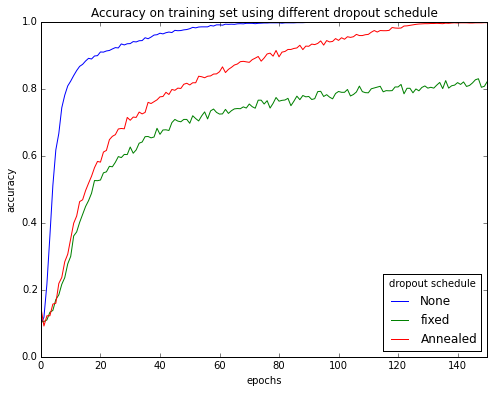

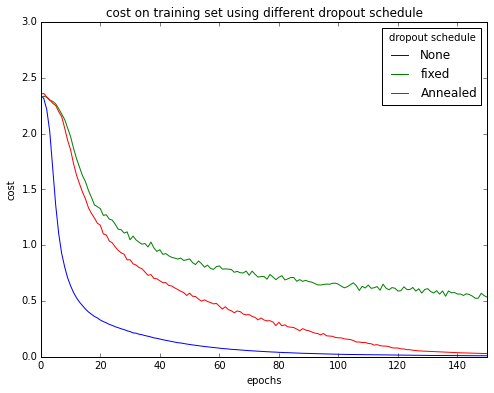

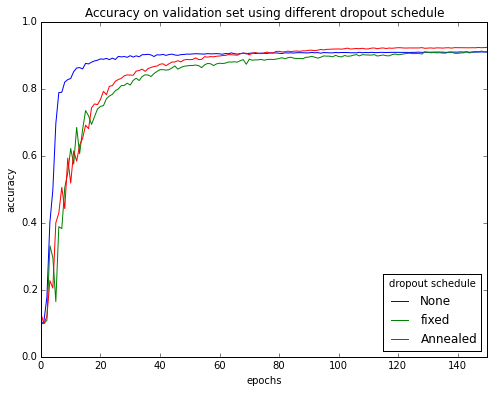

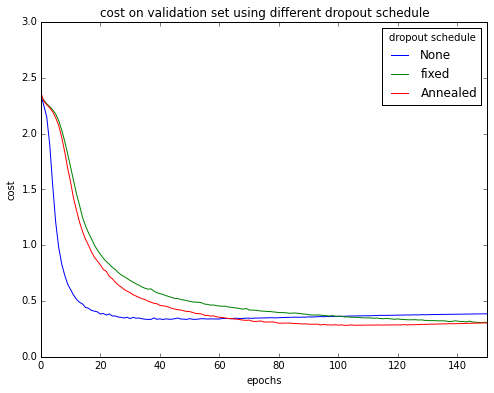

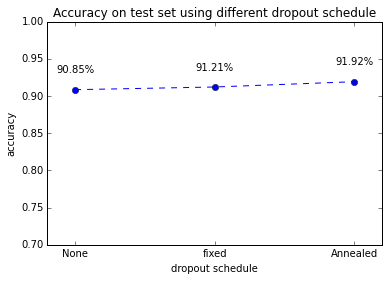

In [18]:
# Plot results of experiments on dropout
%matplotlib inline
x = range(0,max_epochs+1)
legends = ['None', 'fixed', 'Annealed']

# Plot value of the accuracy for training sets as a function of training epochs for each model
pl.figure(1,(8,6))
for i in range(len(dp_schedulers)):
    pl.plot(x, y_t[i][1], linestyle="-", label = legends[i] )
    pl.title('Accuracy on training set using different dropout schedule')
    pl.xlabel('epochs')
    pl.ylabel('accuracy')
    pl.xlim(0,max_epochs)
    pl.ylim(0.0,1.0)
    pl.legend(title = 'dropout schedule', loc='lower right')

# Plot cost for training sets as a function of training epochs for each model
pl.figure(2,(8,6))
for i in range(len(dp_schedulers)):
    pl.plot(x, y_t[i][0], linestyle="-", label = legends[i] )
    pl.title('cost on training set using different dropout schedule')
    pl.xlabel('epochs')
    pl.ylabel('cost')
    pl.xlim(0,max_epochs)
    pl.ylim(0.0,3.0)
    pl.legend(title = 'dropout schedule', loc='upper right')

# Plot value of the accuracy for validation sets as a function of training epochs for each model
pl.figure(3, (8,6))
for i in range(len(dp_schedulers)):
    pl.plot(x, y_v[i][1], linestyle="-", label = legends[i] )
    pl.title('Accuracy on validation set using different dropout schedule')
    pl.xlabel('epochs')
    pl.ylabel('accuracy')
    pl.xlim(0,max_epochs)
    pl.ylim(0.0,1.0)
    pl.legend(title = 'dropout schedule', loc='lower right')

# Plot value of the cost for validation sets as a function of training epochs for each model
pl.figure(4, (8,6))
for i in range(len(dp_schedulers)):
    pl.plot(x, y_v[i][0], linestyle="-", label = legends[i] )
    pl.title('cost on validation set using different dropout schedule')
    pl.xlabel('epochs')
    pl.ylabel('cost')
    pl.xlim(0,max_epochs)
    pl.ylim(0.0,3.0)
    pl.legend(title = 'dropout schedule', loc='upper right')

# Plot the test set classification accuracy against dropout schedulers
pl.figure(5)
x=range(len(dp_schedulers))
pl.plot(x, ac_test, 'bo--')
pl.xlabel('dropout schedule')
pl.ylabel('accuracy')
pl.xticks([0,1,2],legends)
pl.ylim(0.7,1.0)
pl.xlim(-0.2, 2.2)
pl.title('Accuracy on test set using different dropout schedule')
for i in range(3):
    pl.text(x[i], ac_test[i]+0.02, str(ac_test[i]*100)+'%', ha='center', va='bottom')
pl.show()

**Discussion**

From the result showed by graphs above:

1. Using dropout can improve the accuracy on test set.

2. While using dropout, the model learnt much slower than that not use dropout, especially while using fixed dropout schedule. However, the accuracy of model using dropout on validation set is higher and cost is lower finally.

3. Annealed dropout performs better than fixed on in many aspects.

However, this improvement can only be seen while using small training data set, and set reasonable parameters for dropout schedule. If the data set is big enough, dropout approach could not get much improvement.

### Task 3 - Experiments with pretraining (15 marks)

Implement pretraining of multi-layer networks with autoencoders, denoising autoencoders, and using  layer-by-layer cross-entropy training.  

Implementation tip: You could add the corresponding methods to `optimiser`, namely, `pretrain()` and `pretrain_epoch()`, for autoencoders. Simiilarly, `pretrain_discriminative()` and `pretrain_epoch_discriminative()` for cross-entropy layer-by-layer pretraining. Of course, you can modify any other necessary pieces, but include all the modified fragments below.

In [ ]:
### code fragments for autoencoders and denoising autoencoders ###

# define pretrain and pretrain_epoch methods in mlp/optimisers.SGDOptimiser
import numpy
import time
import logging

from mlp.layers import MLP, Linear, Sigmoid, Softmax, Relu, Tanh, Maxout
from mlp.dataset import DataProvider
from mlp.schedulers import LearningRateScheduler
from mlp.costs import MSECost, CECost
from scipy import ndimage

class SGDOptimiser(Optimiser):
    def pretrain_epoch(self, model, train_iterator, learning_rate, denoise=None, noisy_inputs=None):

        assert isinstance(model, MLP), (
            "Expected model to be a subclass of 'mlp.layers.MLP'"
            " class but got %s " % type(model)
        )
        
         
        nll_list = []
        output = [] #output of the first layer
        if isinstance(train_iterator, DataProvider):
            for x, t in train_iterator:
                # get the prediction
                if denoise:
                    inputs=noisy_inputs
                else:
                    inputs=x
                if self.dp_scheduler is not None:
                    y = model.fprop_dropout(inputs, self.dp_scheduler)
                else:
                    y = model.fprop(inputs)

                # compute the cost and grad of the cost w.r.t y
                cost = model.cost.cost(y, x)
                cost_grad = model.cost.grad(y, x)

                # do backward pass through the model
                model.bprop(cost_grad, self.dp_scheduler)

                #update the model, here we iterate over layers
                #and then over each parameter in the layer
                effective_learning_rate = learning_rate / x.shape[0]

                for i in xrange(0, len(model.layers)):
                    params = model.layers[i].get_params()
                    grads = model.layers[i].pgrads(inputs=model.activations[i],
                                                   deltas=model.deltas[i + 1],
                                                   l1_weight=self.l1_weight,
                                                   l2_weight=self.l2_weight)
                    uparams = []
                    for param, grad in zip(params, grads):
                        param = param - effective_learning_rate * grad
                        uparams.append(param)
                    model.layers[i].set_params(uparams)

                nll_list.append(cost)
                output.append(list(model.layers[0].fprop(inputs)))
        else:
            for x in train_iterator:
                # denoising autoencoders
                if denoise:
                    inputs=noisy_inputs
                else:
                    inputs=x
                # get the prediction    
                if self.dp_scheduler is not None:
                    y = model.fprop_dropout(inputs, self.dp_scheduler)
                else:
                    y = model.fprop(inputs)

                # compute the cost and grad of the cost w.r.t y
                cost = model.cost.cost(y, x)
                cost_grad = model.cost.grad(y, x)

                # do backward pass through the model
                model.bprop(cost_grad, self.dp_scheduler)

                #update the model, here we iterate over layers
                #and then over each parameter in the layer
                effective_learning_rate = learning_rate / x.shape[0]

                for i in xrange(0, len(model.layers)):
                    params = model.layers[i].get_params()
                    grads = model.layers[i].pgrads(inputs=model.activations[i],
                                                   deltas=model.deltas[i + 1],
                                                   l1_weight=self.l1_weight,
                                                   l2_weight=self.l2_weight)
                    uparams = []
                    for param, grad in zip(params, grads):
                        param = param - effective_learning_rate * grad
                        uparams.append(param)
                    model.layers[i].set_params(uparams)

                nll_list.append(cost)
                output.append(list(model.layers[0].fprop(inputs)))
        #compute the prior penalties contribution (parameter dependent only)
        prior_costs = Optimiser.compute_prior_costs(model, self.l1_weight, self.l2_weight)
        training_cost = numpy.mean(nll_list) + sum(prior_costs)
       
        return training_cost, numpy.array(output)

        
    def pretrain(self, layer, train_iterator, denoise=False, gaussian=None, mask=None):
        ''' pretrain for autoencoder
            layer: layer object that need to be pretrained
            train_iterator: data for pretraining
            denoise: True or False
            gaussian: gaussian noise rate
            mask:    mask noise rate
        '''
        converged = False
        # define single hidden layer network
        model = MLP(cost=MSECost())
        
        if layer.get_name()=='linear':
            model.add_layer(Linear(idim=layer.idim, odim=layer.odim, irange=0.2))
            model.add_layer(Linear(idim=layer.odim, odim=layer.idim, irange=0.2))
        elif layer.get_name()=='sigmoid':
            model.add_layer(Sigmoid(idim=layer.idim, odim=layer.odim, irange=0.2))
            model.add_layer(Sigmoid(idim=layer.odim, odim=layer.idim, irange=0.2))
        elif layer.get_name()=='softmax':
            model.add_layer(Softmax(idim=layer.idim, odim=layer.odim, irange=0.2))
            model.add_layer(Softmax(idim=layer.odim, odim=layer.idim, irange=0.2))
        elif layer.get_name()=='relu':
            model.add_layer(Relu(idim=layer.idim, odim=layer.odim, irange=0.2))
            model.add_layer(Relu(idim=layer.odim, odim=layer.idim, irange=0.2))
        elif layer.get_name()=='tanh':
            model.add_layer(Tanh(idim=layer.idim, odim=layer.odim, irange=0.2))
            model.add_layer(Tanh(idim=layer.odim, odim=layer.idim, irange=0.2))
        elif layer.get_name()=='maxout':
            model.add_layer(Maxout(idim=layer.idim, odim=layer.odim, irange=0.2))
            model.add_layer(Maxout(idim=layer.odim, odim=layer.idim, irange=0.2))
     
        cost_name = model.cost.get_name()
        # Impelemtn denoising autoencoders
        if denoise:
            for x,t in train_iterator:
                x_noise = x
                if gaussian:
                    assert gaussian>0 and gaussian<1, ("gaussian rate should be in the range of (0,1)")
                    x_noise = ndimage.filters.gaussian_filter(x,gaussian)
                if mask:
                    assert mask>0 and mask<1, ("mask rate should be in the range of (0,1)")
                    rng = numpy.random.RandomState()
                    d = rng.binomial(1, 1-mask, x.shape)
                    x_noise = x_noise*d
        else:
            x_noise = None
            
        while not converged:
            if isinstance(train_iterator, DataProvider):
                train_iterator.reset()

            tstart = time.clock()
            tr_nll, output = self.pretrain_epoch(model=model,
                                              train_iterator=train_iterator,
                                              learning_rate=self.lr_scheduler.get_rate(),
                                              denoise=denoise,
                                              noisy_inputs=x_noise)
            tstop = time.clock()

            logger.info('Epoch %i: Training cost (%s) is %.3f. '
                        % (self.lr_scheduler.epoch + 1, cost_name, tr_nll))

            self.lr_scheduler.get_next_rate(None)

            #pps = presentations per second
            logger.info("Epoch %i: Took %.0f seconds. "                        
                        % (self.lr_scheduler.epoch, tstop-tstart))

            # we stop training when learning rate, as returned by lr scheduler, is 0
            # this is implementation dependent and depending on lr schedule could happen,
            # for example, when max_epochs has been reached or if the progress between
            # two consecutive epochs is too small, etc.
            converged = (self.lr_scheduler.get_rate() == 0)
            layer.set_params(model.layers[0].get_params())
        return output


In [ ]:
# modify bprop_cost in Sigmoid, Relu, Tanh and Maxout layers so that they can use MSE in autoencoder. Below are modified fragments in mlp/layers.py

# in class Sigmoid
if cost is None or cost.get_name() in ['bce', 'mse']:
    return super(Sigmoid, self).bprop(h=h, igrads=igrads)

# in class Relu
if cost is None or cost.get_name() in ['bce', 'mse']:
    return super(Relu, self).bprop(h=h, igrads=igrads)

# in class Tanh
if cost is None or cost.get_name() in ['bce', 'mse']:
    return super(Tanh, self).bprop(h=h, igrads=igrads)

# in class Maxout
if cost is None or cost.get_name() in ['bce', 'mse']:
    return super(Maxout, self).bprop(h=h, igrads=igrads)

In [ ]:
### code fragments for layer by layer pretraining ###

# define pretrain_discriminative and pretrain_epoch_discriminative methods in mlp/optimisers.SGDOptimiser
import numpy
import time
import logging

from mlp.layers import MLP, Linear, Sigmoid, Softmax, Relu, Tanh, Maxout
from mlp.dataset import DataProvider
from mlp.schedulers import LearningRateScheduler
from mlp.costs import MSECost, CECost
from scipy import ndimage

class SGDOptimiser(Optimiser):
    def pretrain_epoch_discriminative(self, model, train_iterator, learning_rate):
        assert isinstance(model, MLP), (
            "Expected model to be a subclass of 'mlp.layers.MLP'"
            " class but got %s " % type(model)
        )
        
         
        nll_list = []
        output = [] #output of the first layer
        target = [] 
        if isinstance(train_iterator, DataProvider):
            for x, t in train_iterator:
                target.append(t)
                # get the prediction
                if self.dp_scheduler is not None:
                    y = model.fprop_dropout(x, self.dp_scheduler)
                else:
                    y = model.fprop(x)

                # compute the cost and grad of the cost w.r.t y
                cost = model.cost.cost(y, t)
                cost_grad = model.cost.grad(y, t)

                # do backward pass through the model
                model.bprop(cost_grad, self.dp_scheduler)

                #update the model, here we iterate over layers
                #and then over each parameter in the layer
                effective_learning_rate = learning_rate / x.shape[0]

                for i in xrange(0, len(model.layers)):
                    params = model.layers[i].get_params()
                    grads = model.layers[i].pgrads(inputs=model.activations[i],
                                                   deltas=model.deltas[i + 1],
                                                   l1_weight=self.l1_weight,
                                                   l2_weight=self.l2_weight)
                    uparams = []
                    for param, grad in zip(params, grads):
                        param = param - effective_learning_rate * grad
                        uparams.append(param)
                    model.layers[i].set_params(uparams)

                nll_list.append(cost)
                output.append(list(model.layers[0].fprop(x)))
        else:
            target = train_iterator[1]
            for i in range(len(train_iterator[0])):
                x = train_iterator[0][i]
                t = train_iterator[1][i]
                # get the prediction
                if self.dp_scheduler is not None:
                    y = model.fprop_dropout(x, self.dp_scheduler)
                else:
                    y = model.fprop(x)

                # compute the cost and grad of the cost w.r.t y
                cost = model.cost.cost(y, t)
                cost_grad = model.cost.grad(y, t)

                # do backward pass through the model
                model.bprop(cost_grad, self.dp_scheduler)

                #update the model, here we iterate over layers
                #and then over each parameter in the layer
                effective_learning_rate = learning_rate / x.shape[0]

                for i in xrange(0, len(model.layers)):
                    params = model.layers[i].get_params()
                    grads = model.layers[i].pgrads(inputs=model.activations[i],
                                                   deltas=model.deltas[i + 1],
                                                   l1_weight=self.l1_weight,
                                                   l2_weight=self.l2_weight)
                    uparams = []
                    for param, grad in zip(params, grads):
                        param = param - effective_learning_rate * grad
                        uparams.append(param)
                    model.layers[i].set_params(uparams)

                nll_list.append(cost)
                output.append(list(model.layers[0].fprop(x)))
        #compute the prior penalties contribution (parameter dependent only)
        prior_costs = Optimiser.compute_prior_costs(model, self.l1_weight, self.l2_weight)
        training_cost = numpy.mean(nll_list) + sum(prior_costs)

        return training_cost,target,numpy.array(output)

    
    def pretrain_discriminative(self, whole_model, layer_num, train_iterator):
        converged = False
        # define single hidden layer network
        if whole_model.cost.get_name()=='mse':
            model = MLP(cost=MSECost())
        elif whole_model.cost.get_name()=='ce':
            model = MLP(cost=CECost())
        # Add the new layer
        layer = whole_model.layers[layer_num]
        if layer.get_name()=='linear':
            model.add_layer(Linear(idim=layer.idim, odim=layer.odim, irange=0.2))
            
        elif layer.get_name()=='sigmoid':
            model.add_layer(Sigmoid(idim=layer.idim, odim=layer.odim, irange=0.2))
           
        elif layer.get_name()=='relu':
            model.add_layer(Relu(idim=layer.idim, odim=layer.odim, irange=0.2))
            
        elif layer.get_name()=='tanh':
            model.add_layer(Tanh(idim=layer.idim, odim=layer.odim, irange=0.2))
           
        elif layer.get_name()=='maxout':
            model.add_layer(Maxout(idim=layer.idim, odim=layer.odim, irange=0.2))
            
        # Add the top layer
        if whole_model.layers[-1].get_name()=='linear':
            model.add_layer(Linear(idim=layer.odim, odim=10, irange=0.2))
        elif whole_model.layers[-1].get_name()=='softmax':
            model.add_layer(Softmax(idim=layer.odim, odim=10, irange=0.2))
        
        cost_name = model.cost.get_name()

        while not converged:
            if isinstance(train_iterator, DataProvider):
                train_iterator.reset()

            tstart = time.clock()
            tr_nll, target, output = self.pretrain_epoch_discriminative(model=model,
                                              train_iterator=train_iterator,
                                              learning_rate=self.lr_scheduler.get_rate())
            tstop = time.clock()

            logger.info('Epoch %i: Training cost (%s) is %.3f. '
                        % (self.lr_scheduler.epoch + 1, cost_name, tr_nll))

            self.lr_scheduler.get_next_rate(None)

            #pps = presentations per second
            logger.info("Epoch %i: Took %.0f seconds. "                        
                        % (self.lr_scheduler.epoch, tstop-tstart))

            # we stop training when learning rate, as returned by lr scheduler, is 0
            # this is implementation dependent and depending on lr schedule could happen,
            # for example, when max_epochs has been reached or if the progress between
            # two consecutive epochs is too small, etc.
            converged = (self.lr_scheduler.get_rate() == 0)
            whole_model.layers[layer_num].set_params(model.layers[0].get_params())
        
            next_train_iterator=(output, target)
        return next_train_iterator

* ** Experiments on pretrain.**

Use layer by layer approach, autoencoder, denoising autoencoder with gaussian noise, denoising autoencoder with mask noise.

In [6]:
# Experiments on pretrain
%matplotlib inline

import numpy
import pylab as pl
import logging
from mlp.dataset import MNISTDataProvider

from mlp.layers import MLP, Linear, Sigmoid, Softmax #import required layer types
from mlp.optimisers import SGDOptimiser #import the optimiser

from mlp.costs import CECost, MSECost #import the cost we want to use for optimisation
import mlp.schedulers as sd
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.info('Initialising data providers...')

max_num_batches = 500
batch_size = 10

train_dp = MNISTDataProvider(dset='train', batch_size=batch_size, max_num_batches=max_num_batches, randomize=True)
valid_dp = MNISTDataProvider(dset='valid', batch_size=10000, max_num_batches=-10, randomize=False)
test_dp = MNISTDataProvider(dset='eval', batch_size=10000, max_num_batches=-10, randomize=False)

rng = numpy.random.RandomState([2015,10,10])

#some hyper-parameters
nhid = 100
num_layer = 5
learning_rate = 0.2                                   # start rate
max_epochs = 30
l1_weight = 0.0
l2_weight = 0.0
cost = CECost()

pretrain = [None, 'layer by layer', 'autoencoder', 'autoencoder gaussian', 'autoencoder mask' ]

y_t = []      # Accuracy and cost on training set
y_v = []      # Accuracy and cost on validation set
ac_test=[]    # Accuracy and cost on test set

for i in xrange(len(pretrain)):

    train_dp.reset()
    valid_dp.reset()
    test_dp.reset()
    
    #define the model
    
   
    model = MLP(cost=cost)
    model.add_layer(Sigmoid(idim=784, odim=nhid, irange=0.2, rng=rng))
    for ii in xrange(1, num_layer):
        logger.info("Stacking hidden layer (%s)" % str(ii+1))
        model.add_layer(Sigmoid(idim=nhid, odim=nhid, irange=0.2, rng=rng))
    model.add_layer(Softmax(idim=nhid, odim=10, rng=rng))
    
    #pretrain
    for n in range(num_layer):
        if pretrain[i]=='layer by layer':
            pre_optimiser = SGDOptimiser(lr_scheduler=sd.LearningRateFixed(learning_rate=0.2, max_epochs=30))
            if n==0:
                next_train_iterator=pre_optimiser.pretrain_discriminative(model, n, train_dp)
            else:
                next_train_iterator=pre_optimiser.pretrain_discriminative(model, n, next_train_iterator)
        elif pretrain[i]=='autoencoder':
            pre_optimiser = SGDOptimiser(lr_scheduler=sd.LearningRateFixed(learning_rate=0.002, max_epochs=30))
            if n==0:
                output=pre_optimiser.pretrain(model.layers[n], train_dp, denoise=False)           
            else:
                output=pre_optimiser.pretrain(model.layers[n], output, denoise=False)
        elif pretrain[i]=='autoencoder gaussian':
            pre_optimiser = SGDOptimiser(lr_scheduler=sd.LearningRateFixed(learning_rate=0.002, max_epochs=30))
            if n==0:
                output=pre_optimiser.pretrain(model.layers[n], train_dp, denoise=False, gaussian=0.1)           
            else:
                output=pre_optimiser.pretrain(model.layers[n], output, denoise=False, gaussian=0.1)
        elif pretrain[i]=='autoencoder mask':
            pre_optimiser = SGDOptimiser(lr_scheduler=sd.LearningRateFixed(learning_rate=0.002, max_epochs=30))
            if n==0:
                output=pre_optimiser.pretrain(model.layers[n], train_dp, denoise=False, mask=0.1)           
            else:
                output=pre_optimiser.pretrain(model.layers[n], output, denoise=False, mask=0.1)   
    
    # define the optimiser, here stochasitc gradient descent
    # with fixed learning rate and max_epochs
    lr_scheduler = sd.LearningRateFixed(learning_rate=learning_rate, max_epochs=max_epochs)
    optimiser = SGDOptimiser(lr_scheduler=lr_scheduler, 
                             dp_scheduler=None,
                             l1_weight=l1_weight, 
                             l2_weight=l2_weight)

    logger.info('Training started...')
    tr_stats, valid_stats = optimiser.train(model, train_dp, valid_dp)

    logger.info('Testing the model on test set:')
    tst_cost, tst_accuracy = optimiser.validate(model, test_dp)
    logger.info('MNIST test set accuracy is %.2f %%, cost (%s) is %.3f'%(tst_accuracy*100., cost.get_name(), tst_cost))
    
    ac_test.append(tst_accuracy)
    
    y_t.append([])            # Append an empty list for storing cost and accuracy of each training epoch
    y_t[i].append([])
    y_t[i].append([])
    y_v.append([])            # Append an empty list for storing cost and accuracy of validation for each epoch
    y_v[i].append([])
    y_v[i].append([])
    for j in range(0,max_epochs+1):
        y_t[i][0].append(tr_stats[j][0])       # get cost in each epoch
        y_v[i][0].append(valid_stats[j][0])
        
        y_t[i][1].append(tr_stats[j][1])       # get accuracy in each epoch
        y_v[i][1].append(valid_stats[j][1])   

import cPickle
with open('pretrain2.pkl','wb') as f:
    cPickle.dump([ac_test,y_t,y_v], f)

INFO:root:Initialising data providers...
INFO:root:Stacking hidden layer (2)
INFO:root:Stacking hidden layer (3)
INFO:root:Stacking hidden layer (4)
INFO:root:Stacking hidden layer (5)
INFO:root:Training started...
INFO:mlp.optimisers:Epoch 0: Training cost (ce) for initial model is 2.323. Accuracy is 10.44%
INFO:mlp.optimisers:Epoch 0: Validation cost (ce) for initial model is 2.319. Accuracy is 10.55%
INFO:mlp.optimisers:Epoch 1: Training cost (ce) is 2.345. Accuracy is 10.32%
INFO:mlp.optimisers:Epoch 1: Validation cost (ce) is 2.310. Accuracy is 10.64%
INFO:mlp.optimisers:Epoch 1: Took 1 seconds. Training speed 6174 pps. Validation speed 32261 pps.
INFO:mlp.optimisers:Epoch 2: Training cost (ce) is 2.312. Accuracy is 10.30%
INFO:mlp.optimisers:Epoch 2: Validation cost (ce) is 2.309. Accuracy is 9.67%
INFO:mlp.optimisers:Epoch 2: Took 1 seconds. Training speed 6025 pps. Validation speed 33337 pps.
INFO:mlp.optimisers:Epoch 3: Training cost (ce) is 2.309. Accuracy is 10.48%
INFO:mlp.

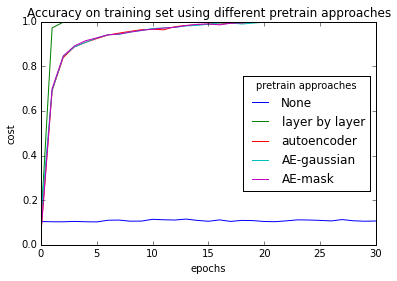

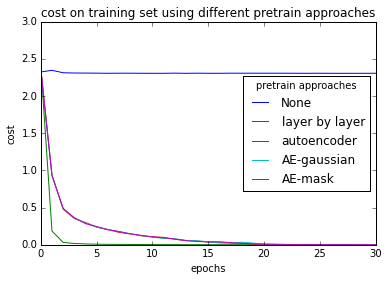

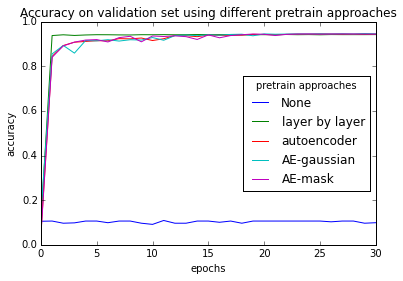

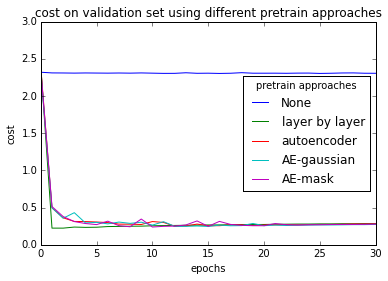

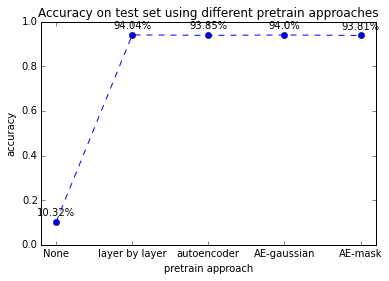

In [9]:
# plot results of experiments on pretrain
%matplotlib inline
with open('pretrain2.pkl','r') as f:
    ac_test, y_t, y_v = cPickle.load(f)
x = range(0,max_epochs+1)
legends = ['None', 'layer by layer', 'autoencoder', 'AE-gaussian', 'AE-mask']

# Plot value of the accuracy for training sets as a function of training epochs for each model
pl.figure(1)
for i in range(len(pretrain)):
    pl.plot(x, y_t[i][1], linestyle="-", label = legends[i] )
    pl.title('Accuracy on training set using different pretrain approaches')
    pl.xlabel('epochs')
    pl.ylabel('cost')
    pl.xlim(0,max_epochs)
    pl.ylim(0.0,1.0)
    pl.legend(title = 'pretrain approaches', loc='right')

# Plot cost for training sets as a function of training epochs for each model
pl.figure(2)
for i in range(len(pretrain)):
    pl.plot(x, y_t[i][0], linestyle="-", label = legends[i] )
    pl.title('cost on training set using different pretrain approaches')
    pl.xlabel('epochs')
    pl.ylabel('cost')
    pl.xlim(0,max_epochs)
    pl.ylim(0.0,3.0)
    pl.legend(title = 'pretrain approaches', loc='right')

# Plot value of the accuracy for validation sets as a function of training epochs for each model
pl.figure(3)
for i in range(len(pretrain)):
    pl.plot(x, y_v[i][1], linestyle="-", label = legends[i] )
    pl.title('Accuracy on validation set using different pretrain approaches')
    pl.xlabel('epochs')
    pl.ylabel('accuracy')
    pl.xlim(0,max_epochs)
    pl.ylim(0.0,1.0)
    pl.legend(title = 'pretrain approaches', loc='right')

# Plot value of the cost for validation sets as a function of training epochs for each model
pl.figure(4)
for i in range(len(pretrain)):
    pl.plot(x, y_v[i][0], linestyle="-", label = legends[i] )
    pl.title('cost on validation set using different pretrain approaches')
    pl.xlabel('epochs')
    pl.ylabel('cost')
    pl.xlim(0,max_epochs)
    pl.ylim(0.0,3.0)
    pl.legend(title = 'pretrain approaches', loc='right')

# Plot the test set classification accuracy against dropout schedulers
pl.figure(5)
x=range(len(pretrain))
pl.plot(x, ac_test, 'bo--')
pl.xlabel('pretrain approach')
pl.ylabel('accuracy')
pl.xticks([0,1,2,3,4],legends)
pl.ylim(0.0,1.0)
pl.xlim(-0.2, 4.2)
pl.title('Accuracy on test set using different pretrain approaches')
for i in range(len(pretrain)):
    pl.text(x[i], ac_test[i]+0.02, str(ac_test[i]*100)+'%', ha='center', va='bottom')
pl.show()

**Discussion**: This experiment is based on a deep neural network with 5 hidden layers. We can see that the importance of pretrain in this deep learning from the last graph of accuracy on test set. Without pretrain, the model are trained very slowly. But it can reach very high accuracy in very early epochs after pretrain.

According to the first 4 graphs (accuracy and cost on test and validation set), layer by layer approach showed very good performance, and it reaches convergence fast and is much more stable on validation set. Also, the accuracy of model pretrained by layer-by-layer is the highest. 

The performance of three autoencoder schedules did not show much difference. Denoisying autoencoder does not have apparent improvement in this experiment.

### Task 4 - Experiments with data augmentation (5 marks)

Using the standard MNIST training data, generate some augmented training examples (for example, using noise or rotation). Perform experiments on using this expanded training data.

* Attach relevent code

In [ ]:
# Relevent added fragment, in dataset.py. Do not run this cell.
# add augment method for MNISTDataProvider class:

    def augment(self, expanded_num=0, rotate=None, gaussian=None, shift=None, mask=None):
        """
        Generate some augmented training examples. Use rotate, gaussion filter, shift and mask.
        input:
            rotate: int or float, rotate angle
            reshape: Ture or False, reshape for rotate
            guassian: int or float, guassian filter degree
            shift: list of number. 
            mask: float(range 0~1), rate of mask
        """
        if expanded_num==0:
            return
        if expanded_num<0:
            #Use all the data, double
            expanded_num=self.x.shape[0]
        
        if expanded_num<=self.x.shape[0]:
            i=0
            new_data = numpy.zeros((expanded_num,784))
            new_target = numpy.zeros(expanded_num)
            
            for x in self.x[0:expanded_num]:
                im = x.reshape(28,28)
   
                if rotate:
                    # creat random rotate rate in (-rotate, rotate) according to setting
                    rng = numpy.random.RandomState()
                    rotate = rng.uniform(-rotate, rotate, 1)
                    im = ndimage.rotate(im, rotate, reshape=False)
                if shift:
                    rng = numpy.random.RandomState()
                    shift[0] = rng.uniform(-shift[0], shift[0], 1)
                    shift[1] = rng.uniform(-shift[1], shift[1], 1)
                    im = ndimage.shift(im,shift)
                if gaussian:
                    # creat random gaussian noise rate in (0, gaussian) according to setting
                    rng = numpy.random.RandomState()
                    gaussian = rng.uniform(0, gaussian, 1)
                    im = im.flatten()
                    im = ndimage.filters.gaussian_filter(im,gaussian)
                if mask:
                    # creat random mask noise rate in (0, mask) according to setting
                    rng = numpy.random.RandomState()
                    mask = rng.uniform(0, mask, 1)
                    rng = numpy.random.RandomState()
                    d = rng.binomial(1, 1-mask, im.shape)
                    im = d*im
                    
                new_data[i] = im.flatten()
                new_target[i] = self.t[i]
                i+=1
             
            # Update self.x and self.t
       
            self.x = numpy.append(self.x, new_data, axis=0)
            self.t = numpy.append(self.t, new_target)
           
        else:
            raise ValueError, 'Expanded_num out of range'

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


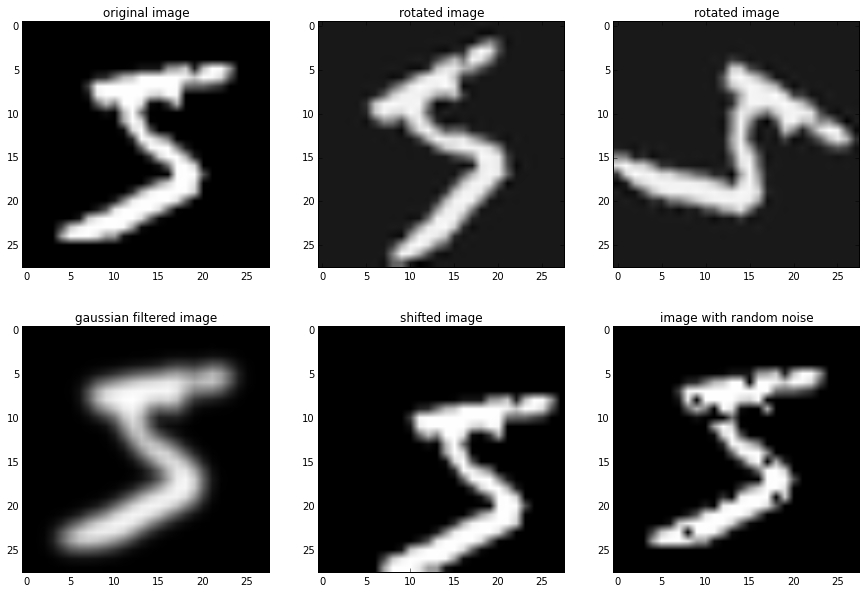

In [4]:
# show distorted training data
%pylab
%matplotlib inline
from numpy import *
from scipy import ndimage
import matplotlib.pyplot as pl
from mlp.dataset import MNISTDataProvider

mnist_dp = MNISTDataProvider(dset='train', batch_size=1, max_num_batches=1, randomize=False)

figure(1,(15,10))
im=mnist_dp.x[0].reshape(28,28)
pl.subplot(231)
pl.title('original image')
pl.imshow(im, cmap=cm.Greys_r)

mnist_dp.augment(expanded_num=1, rotate=20, gaussian=0, shift=None, mask=0)
im=mnist_dp.x[-1].reshape(28,28)
pl.subplot(232)
pl.title('rotated image')
pl.imshow(im, cmap=cm.Greys_r)

mnist_dp.augment(expanded_num=1, rotate=-40, gaussian=0, shift=None, mask=0)
im=mnist_dp.x[-1].reshape(28,28)
pl.subplot(233)
pl.title('rotated image')
pl.imshow(im, cmap=cm.Greys_r)

mnist_dp.augment(expanded_num=1, rotate=0, gaussian=1, shift=None, mask=0)
im=mnist_dp.x[-1].reshape(28,28)
pl.subplot(234)
pl.title('gaussian filtered image')
pl.imshow(im, cmap=cm.Greys_r)

mnist_dp.augment(expanded_num=1, rotate=0, gaussian=0, shift=[3,3], mask=0)
im=mnist_dp.x[-1].reshape(28,28)
pl.subplot(235)
pl.title('shifted image')
pl.imshow(im, cmap=cm.Greys_r)

mnist_dp.augment(expanded_num=1, rotate=0, gaussian=0, shift=None, mask=0.1)
im=mnist_dp.x[-1].reshape(28,28)
pl.subplot(236)
pl.title('image with random noise')
pl.imshow(im, cmap=cm.Greys_r)

# we can also use combined distortion

* **Experiments with data augmentation**

Augmented data: 20000, 50000, 100000 and 150000

In [6]:
# Experiments with data augmentation
%matplotlib inline

import numpy
import pylab as pl
import logging
from mlp.dataset import MNISTDataProvider

from mlp.layers import MLP, Linear, Sigmoid, Softmax #import required layer types
from mlp.optimisers import SGDOptimiser #import the optimiser

from mlp.costs import CECost #import the cost we want to use for optimisation
import mlp.schedulers as sd
import time

logger = logging.getLogger()
logger.setLevel(logging.INFO)
# data information
max_num_batches = -1
batch_size = 10
logger.info('Initialising data providers...')
train_dp = MNISTDataProvider(dset='train', batch_size=batch_size, max_num_batches=max_num_batches, randomize=True)
valid_dp = MNISTDataProvider(dset='valid', batch_size=10000, max_num_batches=-10, randomize=False)
test_dp = MNISTDataProvider(dset='eval', batch_size=10000, max_num_batches=-10, randomize=False)
# augment information
augment_data = [(0, 0, 0, 0, 0),
                (20000, 10, 0.2, [5,5], 0.2),
                (30000, 10, 0.2, [5,5], 0.2),
                (50000, 10, 0.2, [5,5], 0.2),
                (50000, 10, 0.2, [5,5], 0.2)]

rng = numpy.random.RandomState([2015,10,10])

#some hyper-parameters
nhid = 200
layer = 1
learning_rate = 0.2  
max_epochs = 30
cost = CECost()

y_t = []      # Accuracy and cost on training set
y_v = []      # Accuracy and cost on validation set
ac_test=[]    # Accuracy and cost on test set

for i in range(len(augment_data)):
    
    valid_dp.reset()
    test_dp.reset()
    
    #define the model
    model = MLP(cost=cost)
    
    model.add_layer(Sigmoid(idim=784, odim=nhid, irange=0.2, rng=rng))
    for ii in xrange(1, layer):
        logger.info("Stacking hidden layer (%s)" % str(ii+1))
        model.add_layer(Sigmoid(idim=nhid, odim=nhid, irange=0.2, rng=rng))
    model.add_layer(Softmax(idim=nhid, odim=10, rng=rng))
    lr_scheduler=sd.LearningRateFixed(learning_rate=learning_rate, max_epochs=max_epochs)
    optimiser = SGDOptimiser(lr_scheduler=lr_scheduler, 
                                 dp_scheduler=None)
    # augment data
    tstart =time.clock()
    logger.info("augment training data started...")
    train_dp.augment(*augment_data[i])
    tstop = time.clock()
    logger.info("%d data expanded, took %d seconds" %(augment_data[i][0],(tstop-tstart)))
    
    
    logger.info("data size now: %d" %(numpy.shape(train_dp.x)[0]))
    
    

    #train and test model
    logger.info('Training started...')
    tr_stats, valid_stats = optimiser.train(model, train_dp, valid_dp)
    tst_cost, tst_accuracy = optimiser.validate(model, test_dp)
    logger.info('MNIST test set accuracy is %.2f %%, cost (%s) is %.3f'%(tst_accuracy*100., cost.get_name(), tst_cost))

    # store results
    ac_test.append(tst_accuracy)
    y_t.append([])            # Append an empty list for storing cost and accuracy of each training epoch
    y_t[i].append([])
    y_t[i].append([])
    y_v.append([])            # Append an empty list for storing cost and accuracy of validation for each epoch
    y_v[i].append([])
    y_v[i].append([])
    for j in range(0,max_epochs+1):
        y_t[i][0].append(tr_stats[j][0])       # get cost in each epoch
        y_v[i][0].append(valid_stats[j][0])
        
        y_t[i][1].append(tr_stats[j][1])       # get accuracy in each epoch
        y_v[i][1].append(valid_stats[j][1]) 
        

import cPickle
with open('task4_results1223_layer1.pkl','wb') as f:
    cPickle.dump([ac_test,y_t,y_v], f)


INFO:root:Initialising data providers...
INFO:root:augment training data started...
INFO:root:0 data expanded, took 0 seconds
INFO:root:data size now: 50000
INFO:root:Training started...
INFO:mlp.optimisers:Epoch 0: Training cost (ce) for initial model is 2.295. Accuracy is 14.90%
INFO:mlp.optimisers:Epoch 0: Validation cost (ce) for initial model is 2.292. Accuracy is 15.82%
INFO:mlp.optimisers:Epoch 1: Training cost (ce) is 0.337. Accuracy is 89.82%
INFO:mlp.optimisers:Epoch 1: Validation cost (ce) is 0.181. Accuracy is 94.83%
INFO:mlp.optimisers:Epoch 1: Took 8 seconds. Training speed 6235 pps. Validation speed 58829 pps.
INFO:mlp.optimisers:Epoch 2: Training cost (ce) is 0.162. Accuracy is 95.19%
INFO:mlp.optimisers:Epoch 2: Validation cost (ce) is 0.127. Accuracy is 96.63%
INFO:mlp.optimisers:Epoch 2: Took 8 seconds. Training speed 6235 pps. Validation speed 58829 pps.
INFO:mlp.optimisers:Epoch 3: Training cost (ce) is 0.112. Accuracy is 96.65%
INFO:mlp.optimisers:Epoch 3: Validat

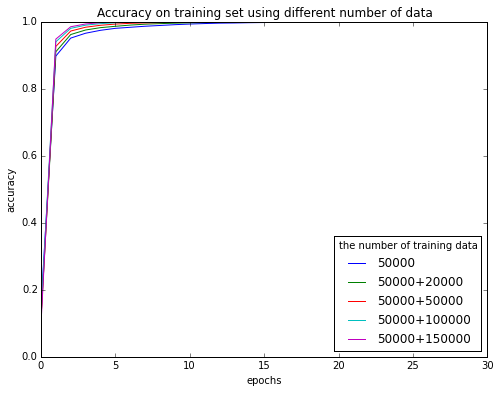

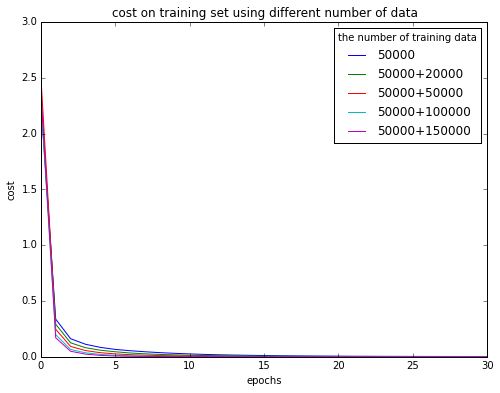

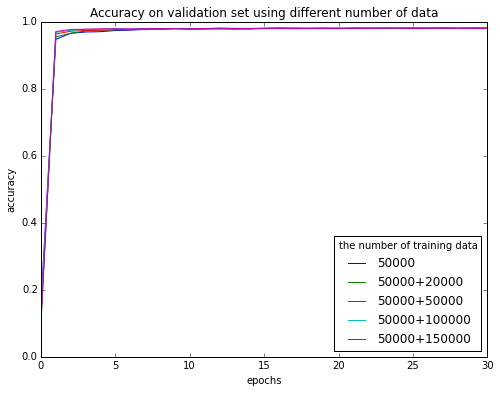

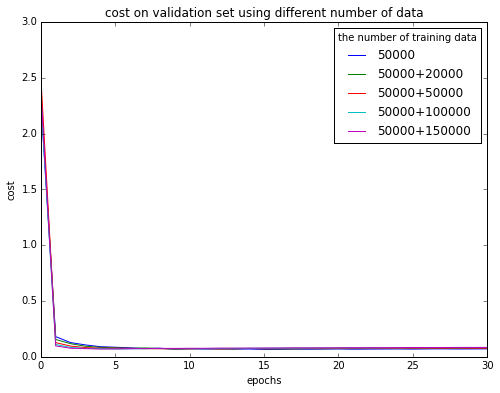

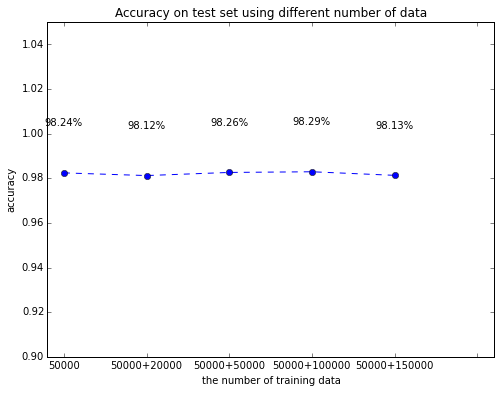

In [14]:
# Plot results of experiments with data augmentation
%matplotlib inline
import pylab as pl
import cPickle
with open('task4_results1223_layer1.pkl','r') as f:
    ac_test,y_t,y_v = cPickle.load(f)

max_epochs = 30
x = range(0,max_epochs+1)
legends = ['50000', '50000+20000', '50000+50000', '50000+100000', '50000+150000']

# Plot value of the accuracy for training sets as a function of training epochs for each model
pl.figure(1,(8,6))
for i in range(len(legends)):
    pl.plot(x, y_t[i][1], linestyle="-", label = legends[i] )
    pl.title('Accuracy on training set using different number of data')
    pl.xlabel('epochs')
    pl.ylabel('accuracy')
    pl.xlim(0,max_epochs)
    pl.ylim(0.0,1.0)
    pl.legend(title = 'the number of training data', loc='lower right')

# Plot cost for training sets as a function of training epochs for each model
pl.figure(2,(8,6))
for i in range(len(legends)):
    pl.plot(x, y_t[i][0], linestyle="-", label = legends[i] )
    pl.title('cost on training set using different number of data')
    pl.xlabel('epochs')
    pl.ylabel('cost')
    pl.xlim(0,max_epochs)
    pl.ylim(0.0,3.0)
    pl.legend(title = 'the number of training data', loc='upper right')

# Plot value of the accuracy for validation sets as a function of training epochs for each model
pl.figure(3, (8,6))
for i in range(len(legends)):
    pl.plot(x, y_v[i][1], linestyle="-", label = legends[i] )
    pl.title('Accuracy on validation set using different number of data')
    pl.xlabel('epochs')
    pl.ylabel('accuracy')
    pl.xlim(0,max_epochs)
    pl.ylim(0.0,1.0)
    pl.legend(title = 'the number of training data', loc='lower right')

# Plot value of the cost for validation sets as a function of training epochs for each model
pl.figure(4, (8,6))
for i in range(len(legends)):
    pl.plot(x, y_v[i][0], linestyle="-", label = legends[i] )
    pl.title('cost on validation set using different number of data')
    pl.xlabel('epochs')
    pl.ylabel('cost')
    pl.xlim(0,max_epochs)
    pl.ylim(0.0,3.0)
    pl.legend(title = 'the number of training data', loc='upper right')

# Plot the test set classification accuracy against dropout schedulers
pl.figure(5,(8,6))
x=range(len(ac_test))
pl.plot(x, ac_test, 'bo--')
pl.xlabel('the number of training data')
pl.ylabel('accuracy')
pl.xticks([0,1,2,3,4,5],legends)
pl.ylim(0.9,1.05)
pl.xlim(-0.2, 5.2)
pl.title('Accuracy on test set using different number of data')
for i in range(5):
    pl.text(x[i], ac_test[i]+0.02, str(ac_test[i]*100)+'%', ha='center', va='bottom')
pl.show()

**Discussion**: In this experiment, I trained 5 models using all the original training data(50000), training data with 20000 augment, training data with 500000 augment, training data with 100000 augment and training data with 150000 augment respecitively. According to the results, using data augmentation did not improve the performance much. While augment 20000 and 150000 data, the accuracy even decreaded. However, the difference among these models are very slight. The accuracy rank probably is not fixed, because the model can reach different local minimum in each train.

Another reason for this result is that the data set is big enough for this model, augment data can not get improvement. Further experiment could be: use small data set, and then augment the data set. Compare the performances of models using original data set and augmented data set.

### Task 5 - State of the art (5 marks)

Using any techniques you have learnt so far (combining any number of them), build and train the best model you can (no other constraints).

* **Model 1**

Model structure: 200 hidden units, 3 hidden layers

Train schedule: 30 epochs, fixed learning rate=0.2, use all the training data set

Accuracy on test set: 98.06%

In [3]:
import numpy
import pylab as pl
import logging
from mlp.dataset import MNISTDataProvider

from mlp.layers import MLP, Linear, Sigmoid, Softmax #import required layer types
from mlp.optimisers import SGDOptimiser #import the optimiser

from mlp.costs import CECost #import the cost we want to use for optimisation
import mlp.schedulers as sd
import time

logger = logging.getLogger()
logger.setLevel(logging.INFO)
# data information
max_num_batches = -1
batch_size = 10
logger.info('Initialising data providers...')
train_dp = MNISTDataProvider(dset='train', batch_size=batch_size, max_num_batches=max_num_batches, randomize=True)
valid_dp = MNISTDataProvider(dset='valid', batch_size=10000, max_num_batches=-10, randomize=False)
test_dp = MNISTDataProvider(dset='eval', batch_size=10000, max_num_batches=-10, randomize=False)

rng = numpy.random.RandomState([2015,10,10])

#some hyper-parameters
nhid = 200
layer = 3
learning_rate = 0.2  
max_epochs = 30
cost = CECost()

model = MLP(cost=cost)
model.add_layer(Sigmoid(idim=784, odim=nhid, irange=0.2, rng=rng))
for ii in xrange(1, layer):
    logger.info("Stacking hidden layer (%s)" % str(ii+1))
    model.add_layer(Sigmoid(idim=nhid, odim=nhid, irange=0.2, rng=rng))
model.add_layer(Softmax(idim=nhid, odim=10, rng=rng))
lr_scheduler=sd.LearningRateFixed(learning_rate=learning_rate, max_epochs=max_epochs)
optimiser = SGDOptimiser(lr_scheduler=lr_scheduler, dp_scheduler=None)

#train and test model
logger.info('Training started...')
tr_stats, valid_stats = optimiser.train(model, train_dp, valid_dp)
tst_cost, tst_accuracy = optimiser.validate(model, test_dp)
logger.info('MNIST test set accuracy is %.2f %%, cost (%s) is %.3f'%(tst_accuracy*100., cost.get_name(), tst_cost))



INFO:root:Initialising data providers...
INFO:root:Stacking hidden layer (2)
INFO:root:Stacking hidden layer (3)
INFO:root:Training started...
INFO:mlp.optimisers:Epoch 0: Training cost (ce) for initial model is 2.459. Accuracy is 9.86%
INFO:mlp.optimisers:Epoch 0: Validation cost (ce) for initial model is 2.455. Accuracy is 9.91%
INFO:mlp.optimisers:Epoch 1: Training cost (ce) is 0.532. Accuracy is 82.69%
INFO:mlp.optimisers:Epoch 1: Validation cost (ce) is 0.216. Accuracy is 93.60%
INFO:mlp.optimisers:Epoch 1: Took 21 seconds. Training speed 2375 pps. Validation speed 25002 pps.
INFO:mlp.optimisers:Epoch 2: Training cost (ce) is 0.196. Accuracy is 93.94%
INFO:mlp.optimisers:Epoch 2: Validation cost (ce) is 0.148. Accuracy is 95.72%
INFO:mlp.optimisers:Epoch 2: Took 22 seconds. Training speed 2350 pps. Validation speed 23812 pps.
INFO:mlp.optimisers:Epoch 3: Training cost (ce) is 0.138. Accuracy is 95.68%
INFO:mlp.optimisers:Epoch 3: Validation cost (ce) is 0.119. Accuracy is 96.44%
I

* **Model 2**

Model structure: 500 hidden units, 3 hidden layers

Train schedule: 30 epochs, fixed learning rate=0.2, use all the training data set

Accuracy on test set: 98.25%

In [1]:
import numpy
import pylab as pl
import logging
from mlp.dataset import MNISTDataProvider

from mlp.layers import MLP, Linear, Sigmoid, Softmax #import required layer types
from mlp.optimisers import SGDOptimiser #import the optimiser

from mlp.costs import CECost #import the cost we want to use for optimisation
import mlp.schedulers as sd
import time

logger = logging.getLogger()
logger.setLevel(logging.INFO)
# data information
max_num_batches = -1
batch_size = 10
logger.info('Initialising data providers...')
train_dp = MNISTDataProvider(dset='train', batch_size=batch_size, max_num_batches=max_num_batches, randomize=True)
valid_dp = MNISTDataProvider(dset='valid', batch_size=10000, max_num_batches=-10, randomize=False)
test_dp = MNISTDataProvider(dset='eval', batch_size=10000, max_num_batches=-10, randomize=False)

rng = numpy.random.RandomState([2015,10,10])

#some hyper-parameters
nhid = 500
layer = 3
learning_rate = 0.2  
max_epochs = 30
cost = CECost()

model = MLP(cost=cost)
model.add_layer(Sigmoid(idim=784, odim=nhid, irange=0.2, rng=rng))
for ii in xrange(1, layer):
    logger.info("Stacking hidden layer (%s)" % str(ii+1))
    model.add_layer(Sigmoid(idim=nhid, odim=nhid, irange=0.2, rng=rng))
model.add_layer(Softmax(idim=nhid, odim=10, rng=rng))
lr_scheduler=sd.LearningRateFixed(learning_rate=learning_rate, max_epochs=max_epochs)
optimiser = SGDOptimiser(lr_scheduler=lr_scheduler, dp_scheduler=None)

#train and test model
logger.info('Training started...')
tr_stats, valid_stats = optimiser.train(model, train_dp, valid_dp)
tst_cost, tst_accuracy = optimiser.validate(model, test_dp)
logger.info('MNIST test set accuracy is %.2f %%, cost (%s) is %.3f'%(tst_accuracy*100., cost.get_name(), tst_cost))


INFO:root:Initialising data providers...
INFO:root:Stacking hidden layer (2)
INFO:root:Stacking hidden layer (3)
INFO:root:Training started...
INFO:mlp.optimisers:Epoch 0: Training cost (ce) for initial model is 2.578. Accuracy is 9.01%
INFO:mlp.optimisers:Epoch 0: Validation cost (ce) for initial model is 2.583. Accuracy is 9.15%
INFO:mlp.optimisers:Epoch 1: Training cost (ce) is 0.446. Accuracy is 85.74%
INFO:mlp.optimisers:Epoch 1: Validation cost (ce) is 0.214. Accuracy is 93.45%
INFO:mlp.optimisers:Epoch 1: Took 81 seconds. Training speed 627 pps. Validation speed 8475 pps.
INFO:mlp.optimisers:Epoch 2: Training cost (ce) is 0.191. Accuracy is 94.13%
INFO:mlp.optimisers:Epoch 2: Validation cost (ce) is 0.152. Accuracy is 95.53%
INFO:mlp.optimisers:Epoch 2: Took 81 seconds. Training speed 628 pps. Validation speed 8548 pps.
INFO:mlp.optimisers:Epoch 3: Training cost (ce) is 0.139. Accuracy is 95.63%
INFO:mlp.optimisers:Epoch 3: Validation cost (ce) is 0.123. Accuracy is 96.41%
INFO:

* **Model 3**  

Model structure: 800 hidden units, 3 hidden layers

Train schedule: 30 epochs, fixed learning rate=0.2, use all the training data set

Accuracy on test set 98.35%
. The best accuracy on test 

In [3]:
import numpy
import pylab as pl
import logging
from mlp.dataset import MNISTDataProvider

from mlp.layers import MLP, Linear, Sigmoid, Softmax #import required layer types
from mlp.optimisers import SGDOptimiser #import the optimiser

from mlp.costs import CECost #import the cost we want to use for optimisation
import mlp.schedulers as sd
import time

logger = logging.getLogger()
logger.setLevel(logging.INFO)
# data information
max_num_batches = -1
batch_size = 10
logger.info('Initialising data providers...')
train_dp = MNISTDataProvider(dset='train', batch_size=batch_size, max_num_batches=max_num_batches, randomize=True)
valid_dp = MNISTDataProvider(dset='valid', batch_size=10000, max_num_batches=-10, randomize=False)
test_dp = MNISTDataProvider(dset='eval', batch_size=10000, max_num_batches=-10, randomize=False)

rng = numpy.random.RandomState([2015,10,10])

#some hyper-parameters
nhid = 800
layer = 3
learning_rate = 0.2  
max_epochs = 30
cost = CECost()

model = MLP(cost=cost)
model.add_layer(Sigmoid(idim=784, odim=nhid, irange=0.2, rng=rng))
for ii in xrange(1, layer):
    logger.info("Stacking hidden layer (%s)" % str(ii+1))
    model.add_layer(Sigmoid(idim=nhid, odim=nhid, irange=0.2, rng=rng))
model.add_layer(Softmax(idim=nhid, odim=10, rng=rng))
lr_scheduler=sd.LearningRateFixed(learning_rate=learning_rate, max_epochs=max_epochs)
optimiser = SGDOptimiser(lr_scheduler=lr_scheduler, dp_scheduler=None)

#train and test model
logger.info('Training started...')
tr_stats, valid_stats = optimiser.train(model, train_dp, valid_dp)
tst_cost, tst_accuracy = optimiser.validate(model, test_dp)
logger.info('MNIST test set accuracy is %.2f %%, cost (%s) is %.3f'%(tst_accuracy*100., cost.get_name(), tst_cost))


INFO:root:Initialising data providers...
INFO:root:Stacking hidden layer (2)
INFO:root:Stacking hidden layer (3)
INFO:root:Training started...
INFO:mlp.optimisers:Epoch 0: Training cost (ce) for initial model is 2.582. Accuracy is 7.38%
INFO:mlp.optimisers:Epoch 0: Validation cost (ce) for initial model is 2.582. Accuracy is 6.92%
INFO:mlp.optimisers:Epoch 1: Training cost (ce) is 0.434. Accuracy is 86.51%
INFO:mlp.optimisers:Epoch 1: Validation cost (ce) is 0.196. Accuracy is 94.16%
INFO:mlp.optimisers:Epoch 1: Took 178 seconds. Training speed 284 pps. Validation speed 4445 pps.
INFO:mlp.optimisers:Epoch 2: Training cost (ce) is 0.178. Accuracy is 94.41%
INFO:mlp.optimisers:Epoch 2: Validation cost (ce) is 0.135. Accuracy is 96.06%
INFO:mlp.optimisers:Epoch 2: Took 170 seconds. Training speed 299 pps. Validation speed 4609 pps.
INFO:mlp.optimisers:Epoch 3: Training cost (ce) is 0.131. Accuracy is 95.88%
INFO:mlp.optimisers:Epoch 3: Validation cost (ce) is 0.111. Accuracy is 96.79%
INF

* **Model 4**

Model structure: 500 hidden units, 4 hidden layers

Train schedule: 30 epochs, fixed learning rate=0.2. Applied layer by layer pretrain. Use augmented training data (doubled).


Accuracy on test set: 98.29%

In [7]:
import numpy
import pylab as pl
import logging
from mlp.dataset import MNISTDataProvider

from mlp.layers import MLP, Linear, Sigmoid, Softmax #import required layer types
from mlp.optimisers import SGDOptimiser #import the optimiser

from mlp.costs import CECost #import the cost we want to use for optimisation
import mlp.schedulers as sd
import time

logger = logging.getLogger()
logger.setLevel(logging.INFO)
# data information
max_num_batches = -1
batch_size = 10
logger.info('Initialising data providers...')
train_dp = MNISTDataProvider(dset='train', batch_size=batch_size, max_num_batches=max_num_batches, randomize=True)
valid_dp = MNISTDataProvider(dset='valid', batch_size=10000, max_num_batches=-10, randomize=False)
test_dp = MNISTDataProvider(dset='eval', batch_size=10000, max_num_batches=-10, randomize=False)

rng = numpy.random.RandomState([2015,10,10])

#some hyper-parameters
nhid = 500
num_layer = 4
learning_rate = 0.2  
max_epochs = 30
cost = CECost()

############### Set model
model = MLP(cost=cost)
model.add_layer(Sigmoid(idim=784, odim=nhid, irange=0.2, rng=rng))
for ii in xrange(1, num_layer):
    logger.info("Stacking hidden layer (%s)" % str(ii+1))
    model.add_layer(Sigmoid(idim=nhid, odim=nhid, irange=0.2, rng=rng))
model.add_layer(Softmax(idim=nhid, odim=10, rng=rng))
lr_scheduler=sd.LearningRateFixed(learning_rate=learning_rate, max_epochs=max_epochs)
optimiser = SGDOptimiser(lr_scheduler=lr_scheduler, dp_scheduler=None)

################ Pretrain model using layer by layer
logger.info('Pretraining started...')
for n in range(num_layer):
    pre_optimiser = SGDOptimiser(lr_scheduler=sd.LearningRateFixed(learning_rate=0.2, max_epochs=30))
    if n==0:
        next_train_iterator=pre_optimiser.pretrain_discriminative(model, n, train_dp)
    else:
        next_train_iterator=pre_optimiser.pretrain_discriminative(model, n, next_train_iterator)

############### Augment 50000 images
logger.info('Data augmentation started...')
train_dp.augment(50000, 10, 0.2, [5,5], 0.2)
logger.info("data size now: %d, expand %d data" %(numpy.shape(train_dp.x)[0], numpy.shape(train_dp.x)[0]-50000))
############### Train and test model
logger.info('Training started...')
tr_stats, valid_stats = optimiser.train(model, train_dp, valid_dp)
tst_cost, tst_accuracy = optimiser.validate(model, test_dp)
logger.info('MNIST test set accuracy is %.2f %%, cost (%s) is %.3f'%(tst_accuracy*100., cost.get_name(), tst_cost))

INFO:root:Initialising data providers...
INFO:root:Stacking hidden layer (2)
INFO:root:Stacking hidden layer (3)
INFO:root:Stacking hidden layer (4)
INFO:root:Pretraining started...
INFO:mlp.optimisers:Epoch 1: Training cost (ce) is 0.333. 
INFO:mlp.optimisers:Epoch 1: Took 29 seconds. 
INFO:mlp.optimisers:Epoch 2: Training cost (ce) is 0.154. 
INFO:mlp.optimisers:Epoch 2: Took 29 seconds. 
INFO:mlp.optimisers:Epoch 3: Training cost (ce) is 0.107. 
INFO:mlp.optimisers:Epoch 3: Took 29 seconds. 
INFO:mlp.optimisers:Epoch 4: Training cost (ce) is 0.081. 
INFO:mlp.optimisers:Epoch 4: Took 29 seconds. 
INFO:mlp.optimisers:Epoch 5: Training cost (ce) is 0.063. 
INFO:mlp.optimisers:Epoch 5: Took 31 seconds. 
INFO:mlp.optimisers:Epoch 6: Training cost (ce) is 0.050. 
INFO:mlp.optimisers:Epoch 6: Took 31 seconds. 
INFO:mlp.optimisers:Epoch 7: Training cost (ce) is 0.041. 
INFO:mlp.optimisers:Epoch 7: Took 29 seconds. 
INFO:mlp.optimisers:Epoch 8: Training cost (ce) is 0.034. 
INFO:mlp.optimise

# Part 2. Convolutional Neural Networks (55 marks)

In this part of the coursework, you are required to implement deep convolutional networks.  This includes code for forward prop, back prop, and weight updates for convolutional and max-pooling layers, and should support the stacking of convolutional + pooling layers.  You should implement all the parts relating to the convolutional layer in the mlp/conv.py module; if you decide to implement some routines in cython, keep them in mlp/conv.pyx). Attach both files in this notebook.

Implementation tips: Look at [lecture 7](http://www.inf.ed.ac.uk/teaching/courses/mlp/2015/mlp07-cnn.pdf) and [lecture 8](http://www.inf.ed.ac.uk/teaching/courses/mlp/2015/mlp08-cnn2.pdf), and the introductory tutorial, [06_MLP_Coursework2_Introduction.ipynb](https://github.com/CSTR-Edinburgh/mlpractical/blob/master/06_MLP_Coursework2_Introduction.ipynb)

### Task 6 -  Implement convolutional layer (20 marks)

Implement linear convolutional layer, and then extend to sigmoid and ReLU transfer functions (do it in a similar way to fully-connected layers). Include all relevant code.  It is recommended that you first implement in the naive way with nested loops (python and/or cython);  optionally you may then implement in a vectorised way in numpy.  Include logs for each way you implement the convolutional layer, as timings for different implementations are of interest.  Include all relevant code.

* **Attach revelent code as following**

In [ ]:
# %load -s my2_conv2d mlp/conv.py

##### vectorised way #####

def my2_conv2d(image, kernels, bias, strides=(1, 1)):
    """
    Implements a 2d valid convolution of kernels with the image
    Note: filer means the same as kernel and convolution (correlation) of those with the input space
    produces feature maps (sometimes refereed to also as receptive fields). Also note, that
    feature maps are synonyms here to channels, and as such num_inp_channels == num_inp_feat_maps
    :param image: 4D tensor of sizes (batch_size, num_input_channels, img_shape_x, img_shape_y)
    :param filters: 4D tensor of filters of size (num_inp_feat_maps, num_out_feat_maps, kernel_shape_x, kernel_shape_y)
    :param strides: a tuple (stride_x, stride_y), specifying the shift of the kernels in x and y dimensions
    :return: 4D tensor of size (batch_size, num_out_feature_maps, feature_map_shape_x, feature_map_shape_y)
    """
    batch_size, num_input_channels, img_shape_x, img_shape_y = image.shape
    num_inp_feat_maps, num_out_feat_maps, kernel_shape_x, kernel_shape_y = kernels.shape
    
    assert num_input_channels == num_inp_feat_maps, ("The number of input feature maps does not match!")
    
    # compute feature_map_shape_x and feature_map_shape_y
    if (img_shape_x - kernel_shape_x)%strides[0]:
        feature_map_shape_x = (img_shape_x - kernel_shape_x)/strides[0] + 2
        # add zeros into image 
        add_num = strides[0]-(img_shape_x - kernel_shape_x)%strides[0]
        add0 = numpy.zeros((batch_size, num_input_channels,add_num, img_shape_y))
        img = numpy.append(image,add0,axis = 2)
        img_shape_x += add_num
    else:
        feature_map_shape_x = (img_shape_x - kernel_shape_x)/strides[0] +1
        img = image
        
    if (img_shape_y - kernel_shape_y)%strides[1]:
        feature_map_shape_y = (img_shape_y - kernel_shape_y)/strides[1] + 2
        # add zeros into image 
        add_num = strides[1] -(img_shape_y - kernel_shape_y)%strides[1]
        add0 = numpy.zeros((batch_size, num_input_channels, img_shape_x, add_num))
        img = numpy.append(img,add0,axis = 3)
        img_shape_y += add_num
    else:
        feature_map_shape_y = (img_shape_y - kernel_shape_y)/strides[1] + 1
            
    num_out_feature_maps = num_out_feat_maps
    
    a = numpy.zeros((batch_size, num_out_feature_maps, feature_map_shape_x, feature_map_shape_y))
    
    kernel_size = kernels.shape[2]*kernels.shape[3]
    output_size = feature_map_shape_x*feature_map_shape_y
    
    kernel_x = num_out_feat_maps
    kernel_y = num_inp_feat_maps*kernel_size
    
    img_x = kernel_y
    img_y = output_size*batch_size
    
    kernel_2d = numpy.zeros((kernel_x,kernel_y))
    img_2d = numpy.zeros((img_x,img_y))

    for i in xrange(num_out_feat_maps):
        for j in xrange(num_inp_feat_maps):
            kernel_2d[i,j*kernel_size:(j+1)*kernel_size] += kernels[j][i].flatten()
            
    for h in xrange(batch_size):
        for m in xrange(num_inp_feat_maps):
            for j in xrange(feature_map_shape_x):
                for k in xrange(feature_map_shape_y):
                    n = j*feature_map_shape_y+k
                    data = img[h][m][j*strides[0]:(j*strides[0]+kernels.shape[2]),k*strides[1]:(k*strides[1]+kernels.shape[3])]
                    
                    img_2d[m*kernel_size:(m+1)*kernel_size,h*output_size+n]=data.flatten()
                      
    temp = numpy.dot(kernel_2d,img_2d)
    
    for i in xrange(batch_size):
        for j in xrange(num_out_feat_maps):
            a[i][j] = (temp[j,i*output_size:(i+1)*output_size]+bias[j]).reshape(feature_map_shape_x, feature_map_shape_y)
                     
    return a


In [ ]:
# %load -s my1_conv2d mlp/conv.py

##### nested loops convolution #####

def my1_conv2d(image, kernels, b, strides=(1, 1)):
    """
    Implements a 2d valid convolution of kernels with the image
    Note: filer means the same as kernel and convolution (correlation) of those with the input space
    produces feature maps (sometimes refereed to also as receptive fields). Also note, that
    feature maps are synonyms here to channels, and as such num_inp_channels == num_inp_feat_maps
    :param image: 4D tensor of sizes (batch_size, num_input_channels, img_shape_x, img_shape_y)
    :param filters: 4D tensor of filters of size (num_inp_feat_maps, num_out_feat_maps, kernel_shape_x, kernel_shape_y)
    :param strides: a tuple (stride_x, stride_y), specifying the shift of the kernels in x and y dimensions
    :return: 4D tensor of size (batch_size, num_out_feature_maps, feature_map_shape_x, feature_map_shape_y)
    """
    batch_size, num_input_channels, img_shape_x, img_shape_y = image.shape
    num_inp_feat_maps, num_out_feat_maps, kernel_shape_x, kernel_shape_y = kernels.shape
    
    assert num_input_channels == num_inp_feat_maps, ("The number of input feature maps does not match!")
    
    # compute feature_map_shape_x and feature_map_shape_y
    if (img_shape_x - kernel_shape_x)%strides[0]:
        feature_map_shape_x = (img_shape_x - kernel_shape_x)/strides[0] + 2
        # add zeros into image 
        add_num = strides[0]-(img_shape_x - kernel_shape_x)%strides[0]
        add0 = numpy.zeros((batch_size, num_input_channels,add_num, img_shape_y))
        img = numpy.append(image,add0,axis = 2)
        img_shape_x += add_num
    else:
        feature_map_shape_x = (img_shape_x - kernel_shape_x)/strides[0] +1
        img = image
        
    if (img_shape_y - kernel_shape_y)%strides[1]:
        feature_map_shape_y = (img_shape_y - kernel_shape_y)/strides[1] + 2
        # add zeros into image 
        add_num = strides[1] -(img_shape_y - kernel_shape_y)%strides[1]
        add0 = numpy.zeros((batch_size, num_input_channels, img_shape_x, add_num))
        img = numpy.append(img,add0,axis = 3)
        img_shape_y += add_num
    else:
        feature_map_shape_y = (img_shape_y - kernel_shape_y)/strides[1] + 1
        
        
    num_out_feature_maps = num_out_feat_maps
    
    a = numpy.zeros((batch_size, num_out_feature_maps, feature_map_shape_x, feature_map_shape_y))
    term = numpy.zeros((feature_map_shape_x, feature_map_shape_y))
    # compute feature maps
    for i in range(batch_size):
        for j in range(num_input_channels):
            for k in range(num_out_feat_maps):
                for l in range(feature_map_shape_x):
                    for m in range(feature_map_shape_y):
                        term[l][m] = numpy.sum(img[i][j][l*strides[0]:l*strides[0]+kernel_shape_x, m*strides[1]: m*strides[1]+kernel_shape_y] * kernels[j][k])
                
                a[i][k] = a[i][k] + term
     
    for i in range(batch_size):
        for j in range(num_out_feat_maps):
            a[i][j] = a[i][j] + b[j]
                                
    return a

# use vectorised way in numpy            


In [ ]:
# %load -s ConvLinear mlp/conv.py
class ConvLinear(Layer):
    def __init__(self,
                 num_inp_feat_maps,
                 num_out_feat_maps,
                 image_shape=(28, 28),
                 kernel_shape=(5, 5),
                 stride=(1, 1),
                 irange=0.2,
                 rng=None,
                 conv_fwd=my2_conv2d,
                 conv_bck=my2_conv2d,
                 conv_grad=my2_conv2d):
        """

        :param num_inp_feat_maps: int, a number of input feature maps (channels)
        :param num_out_feat_maps: int, a number of output feature maps (channels)
        :param image_shape: tuple, a shape of the image
        :param kernel_shape: tuple, a shape of the kernel
        :param stride: tuple, shift of kernels in both dimensions
        :param irange: float, initial range of the parameters
        :param rng: RandomState object, random number generator
        :param conv_fwd: handle to a convolution function used in fwd-prop
        :param conv_bck: handle to a convolution function used in backward-prop
        :param conv_grad: handle to a convolution function used in pgrads
        :return:
        """

        super(ConvLinear, self).__init__(rng=rng)
        self.num_inp_feat_maps = num_inp_feat_maps
        self.num_out_feat_maps = num_out_feat_maps
        self.image_shape = image_shape
        self.kernel_shape = kernel_shape
        self.stride = stride
        self.conv_fwd = conv_fwd
        self.conv_bck = conv_bck
        self.conv_grad = conv_grad
        self.feature_map_shape = None
        
        self.W = self.rng.uniform(
            -irange, irange,
            (self.num_inp_feat_maps, self.num_out_feat_maps, self.kernel_shape[0], self.kernel_shape[1]))
        
        self.b = numpy.zeros(self.num_out_feat_maps,  dtype=numpy.float32)

    def fprop(self, inputs):
        if inputs.ndim == 2:
            inputs = inputs.reshape(inputs.shape[0], 1, self.image_shape[0], self.image_shape[1])
            
        a = self.conv_fwd(inputs, self.W, self.b, self.stride)
        self.feature_map_shape = (a.shape[2], a.shape[3])
        return a
      
    def bprop(self, h, igrads):
        #deltas == igrads
        if igrads.ndim !=4:
            deltas = igrads.reshape(igrads.shape[0], self.num_out_feat_maps, self.feature_map_shape[0], self.feature_map_shape[1])
        else:
            deltas = igrads
        
        W_bprop = numpy.zeros((self.W.shape[1],self.W.shape[0],self.W.shape[2],self.W.shape[3])) 
        for i in range(self.num_out_feat_maps):
            for j in range(self.num_inp_feat_maps):
                W_bprop[i][j] = numpy.rot90(self.W[j][i], 2)
        
        
        deltas_new = numpy.zeros((deltas.shape[0], deltas.shape[1], deltas.shape[2]+self.kernel_shape[0]*2-2, deltas.shape[3]+self.kernel_shape[1]*2-2))
        for i in range(deltas.shape[0]):
            for j in range(deltas.shape[1]):
                deltas_new[i][j][self.kernel_shape[0]-1 : self.kernel_shape[0]-1 + deltas.shape[2], self.kernel_shape[1]-1 : self.kernel_shape[1]-1 + deltas.shape[3]]= deltas[i][j]
        
        bias = numpy.zeros(self.num_inp_feat_maps, dtype = numpy.float32)
        ograds = self.conv_bck(deltas_new, W_bprop, bias, self.stride)
        return deltas, ograds                     

    def bprop_cost(self, h, igrads, cost):
        raise NotImplementedError('ConvLinear.bprop_cost method not implemented')

    def pgrads(self, inputs, deltas, l1_weight=0, l2_weight=0):
        if inputs.ndim == 2:
            inputs = inputs.reshape(inputs.shape[0], 1, self.image_shape[0], self.image_shape[1])

        l2_W_penalty, l2_b_penalty = 0, 0
        if l2_weight > 0:
            l2_W_penalty = l2_weight*self.W
            l2_b_penalty = l2_weight*self.b

        l1_W_penalty, l1_b_penalty = 0, 0
        if l1_weight > 0:
            l1_W_penalty = l1_weight*numpy.sign(self.W)
            l1_b_penalty = l1_weight*numpy.sign(self.b)
            
        grad_W = numpy.zeros(self.W.shape)
        
        # compute grad_W
        image = numpy.zeros((1,1,inputs.shape[2],inputs.shape[3]))
        W = numpy.zeros((1,deltas.shape[1], deltas.shape[2], deltas.shape[3]))
        b = numpy.zeros(deltas.shape[1], dtype = numpy.float32)        
        for i in range(inputs.shape[1]):  # number of  channels/input maps
            for j in range(inputs.shape[0]): # number of batches
                image[0][0] = inputs[j][i]
                W[0] = deltas[j]
                term = self.conv_grad(image, W, b, self.stride)
                grad_W[i]=grad_W[i] + term[0]
        
        grad_b = numpy.zeros(deltas.shape[1])
        for i in range(deltas.shape[1]):
            grad_b[i] = numpy.sum(deltas[:,i])
        
        grad_W = grad_W + l2_W_penalty + l1_W_penalty
        grad_b = grad_b + l2_b_penalty + l1_b_penalty        
        return [grad_W, grad_b]

    def get_params(self):
        return [self.W, self.b]

    def set_params(self, params):
        self.W = params[0]
        self.b = params[1]

    def get_name(self):
        return 'convlinear'

#you can derive here particular non-linear implementations:
#class ConvSigmoid(ConvLinear):
#...


In [ ]:
# %load -s ConvSigmoid mlp/conv.py
class ConvSigmoid(ConvLinear):
    def __int__(self, 
                num_inp_feat_maps,
                 num_out_feat_maps,
                 image_shape=(28, 28),
                 kernel_shape=(5, 5),
                 stride=(1, 1),
                 irange=0.2,
                 rng=None,
                 conv_fwd=my2_conv2d,
                 conv_bck=my2_conv2d,
                 conv_grad=my2_conv2d):
        super(ConvSigmoid, slef).__int__(num_inp_feat_maps, num_out_feat_maps, image_shape, kernel_shape, stride, irange, rng, conv_fwd, conv_bck, conv_grad)
        
    def fprop(self, inputs):
        #get the linear activations
        a = super(ConvSigmoid, self).fprop(inputs)
        self.feature_map_shape = (a.shape[2], a.shape[3])
        # a[a < -30.] = -30,
        # a[a > 30.] = 30.
        numpy.clip(a, -30.0, 30.0, out=a)
        h = 1.0/(1 + numpy.exp(-a))
        return h
    
    def bprop(self, h, igrads):
        dsigm = h * (1.0 - h)
        
        if igrads.ndim !=4:
            deltas = igrads.reshape(igrads.shape[0], self.num_out_feat_maps, self.feature_map_shape[0], self.feature_map_shape[1])
        
        deltas = igrads * dsigm
        ___, ograds = super(ConvSigmoid, self).bprop(h=None, igrads=deltas)
        return deltas, ograds
        
    def bprop_cost(self, h, igrads, cost):
        pass

    def get_name(self):
        return 'convsigmoid'


In [ ]:
# %load -s ConvReLU mlp/conv.py
class ConvReLU(ConvLinear):
    def __int__(self, 
                num_inp_feat_maps,
                 num_out_feat_maps,
                 image_shape=(28, 28),
                 kernel_shape=(5, 5),
                 stride=(1, 1),
                 irange=0.2,
                 rng=None,
                 conv_fwd=my2_conv2d,
                 conv_bck=my2_conv2d,
                 conv_grad=my2_conv2d):
        super(ConvReLU, self).__int__(num_inp_feat_maps, num_out_feat_maps, image_shape, kernel_shape, stride, irange, rng, conv_fwd, conv_bck, conv_grad)
        
    def fprop(self, inputs):
        #get the linear activations
        a = super(ConvReLU, self).fprop(inputs)
        self.feature_map_shape = (a.shape[2], a.shape[3])
        #h = numpy.maximum(a, 0)
        h = numpy.clip(a, 0, 20.0)
        return h
    
    def bprop(self, h, igrads):
        
        if igrads.ndim !=4:
            deltas = igrads.reshape(igrads.shape[0], self.num_out_feat_maps, self.feature_map_shape[0], self.feature_map_shape[1])
        
        deltas = (h > 0)*igrads
        ___, ograds = super(ConvReLU, self).bprop(h=None, igrads=deltas)
        return deltas, ograds
    
    def bprop_cost(self, h, igrads, cost):
        raise NotImplementedError('ConvReLU.bprop_cost method not implemented '
                                      'for the %s cost' % cost.get_name())
    def get_name(self):
        return 'convrelu'    


* **Check linear convolutional layer**

In [1]:
import numpy
from mlp.conv import ConvLinear
from mlp.utils import test_conv_linear_fprop,test_conv_linear_bprop, test_conv_linear_pgrads, verify_gradient
layer = ConvLinear(3, 2, kernel_shape=(2,2), stride=(1,1))
a = test_conv_linear_fprop(layer)
b = test_conv_linear_bprop(layer)
c = test_conv_linear_pgrads(layer)
print a, b, c

True True True


* **Check linear, sigmoid and ReLU convolutional layer**

In [1]:
import numpy
from mlp.conv import ConvLinear, ConvSigmoid, ConvReLU, ConvMaxPool2D
from mlp.utils import test_conv_linear_fprop,test_conv_linear_bprop, test_conv_linear_pgrads, verify_layer_gradient
dtype = numpy.float
inputs = numpy.arange(96).reshape((3,2,4,4)).astype(dtype)
layer1 = ConvLinear(2,4,image_shape=(4, 4), kernel_shape=(2,2), stride=(1,1))
layer2 = ConvSigmoid(2,4,image_shape=(4,4), kernel_shape=(2,2), stride=(1,1))
layer3 = ConvReLU(2,4,image_shape=(4,4), kernel_shape=(2,2), stride=(1,1))     # use h = numpy.maximum(a, 0) in fprop
layer4 = ConvMaxPool2D(2,[4,4])
a = verify_layer_gradient(layer1, inputs,tol = 1e-4)
b = verify_layer_gradient(layer2, inputs,tol = 1e-4)
c = verify_layer_gradient(layer3, inputs,tol = 1e-4)
d = verify_layer_gradient(layer4, inputs,tol = 1e-4)
print a, b, c, d

True True True True


* **Timing comparisons between the nested loops and vectorised way of convolution**

In [9]:
from mlp.conv import ConvLinear, my1_conv2d, my2_conv2d
from mlp.dataset import MNISTDataProvider
import time
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

layer_loops = ConvLinear(num_inp_feat_maps=1,num_out_feat_maps=10,conv_fwd=my1_conv2d)
layer_vectorised = ConvLinear(num_inp_feat_maps=1,num_out_feat_maps=10,conv_fwd=my2_conv2d)

inputs = MNISTDataProvider(dset='valid', batch_size=10, max_num_batches=-1, randomize=True)

tstart = time.clock()
layer_loops.fprop(inputs.x)
tstop = time.clock()
logger.info("nested loops approach Took %.0f seconds for generating 100000 convolutional feature maps." % (tstop-tstart))

tstart = time.clock()
layer_vectorised.fprop(inputs.x)
tstop = time.clock()
logger.info("Vectorised approach Took %.0f seconds for generating 100000 convolutional feature maps." % (tstop-tstart))

INFO:root:nested loops approach Took 291 seconds for generating 100000 convolutional feature maps.
INFO:root:Vectorised approach Took 13 seconds for generating 100000 convolutional feature maps.


**Discussion**: The comparison shows that vectorised approach reduced computing time sharply.

### Task 7 - Implement max-pooling layer (10 marks)

Implement a max-pooling layer. Non-overlapping pooling (which was assumed in the lecture presentation) is required. You may also implement a more generic solution with striding as well. Include all relevant code.

** Attach relevent code **

In [ ]:
# %load -s ConvMaxPool2D mlp/conv.py
class ConvMaxPool2D(Layer):
    def __init__(self,
                 num_feat_maps,
                 conv_shape,
                 pool_shape=(2, 2),
                 pool_stride=(2, 2)):
        """

        :param conv_shape: tuple, a shape of the lower convolutional feature maps output
        :param pool_shape: tuple, a shape of pooling operator
        :param pool_stride: tuple, a strides for pooling operator
        :return:
        """

        super(ConvMaxPool2D, self).__init__(rng=None)
        self.num_feat_maps = num_feat_maps
        self.conv_shape = conv_shape
        self.pool_shape = pool_shape
        self.pool_stride = pool_stride
        self.G = None     # pseudo weight matrix
        self.out_map_shape = None
  
    def fprop(self, inputs):
        """
        input:4D tensor of size (batch_size, num_feature_maps, feature_map_shape_x, feature_map_shape_y)
        return: 4D tensor of size (batch_size, num_feature_maps, pooled_feat_shape_x, pooled_feat_shape_y)
        """
        
        assert self.num_feat_maps==inputs.shape[1], ("num_feat_maps != num_feat_maps of inputs")
        
        batch_size, num_feature_maps, feature_map_shape_x, feature_map_shape_y = inputs.shape
        self.G = numpy.zeros(inputs.shape)
        # add zeros into feature map when its shape is not match
        if (feature_map_shape_x - self.pool_shape[0])%self.pool_stride[0]:
            pooled_feat_shape_x = (feature_map_shape_x - self.pool_shape[0])/self.pool_stride[0] + 2
             
            add_num = self.pool_stride[0] - ((feature_map_shape_x - self.pool_shape[0])%self.pool_stride[0])
            add0 = numpy.zeros((batch_size, num_feature_maps, add_num, feature_map_shape_y))
            img = numpy.append(inputs,add0,axis = 2)
            feature_map_shape_x += add_num    
        else:
            pooled_feat_shape_x = (feature_map_shape_x - self.pool_shape[0])/self.pool_stride[0] +1
            img = inputs

        if (feature_map_shape_y - self.pool_shape[1])%self.pool_stride[1]:
            pooled_feat_shape_y = (feature_map_shape_y - self.pool_shape[1])/self.pool_stride[1] + 2
            
            add_num = self.pool_stride[1] -(feature_map_shape_y - self.pool_shape[1])%self.pool_stride[1]
            add0 = numpy.zeros((batch_size, num_feature_maps, feature_map_shape_x, add_num))
            img = numpy.append(img,add0,axis = 3)
            feature_map_shape_y += add_num            
        else:
            pooled_feat_shape_y = (feature_map_shape_y - self.pool_shape[1])/self.pool_stride[1] + 1
                   
        a = numpy.zeros((batch_size, num_feature_maps, pooled_feat_shape_x, pooled_feat_shape_y))
        
        self.out_map_shape = (pooled_feat_shape_x, pooled_feat_shape_y)
        
        for i in range(batch_size):
            for j in range(num_feature_maps):
                for k in range(pooled_feat_shape_x):
                    for l in range(pooled_feat_shape_y):
                        pool = img[i][j][k*self.pool_stride[0]:k*self.pool_stride[0]+self.pool_shape[0], l*self.pool_stride[1]:l*self.pool_stride[1]+self.pool_shape[1]]
                        
                        a[i][j][k][l], max_position = max_and_argmax(pool,keepdims_argmax=True)
                        self.G[i][j][k*self.pool_stride[0] + max_position[0]][l*self.pool_stride[1] + max_position[1]] = 1
        
        '''
        a1 = inputs.reshape(batch_size, num_feature_maps, feature_map_shape_x/self.pool_shape[0], self.pool_shape[0], feature_map_shape_y/self.pool_shape[1], self.pool_shape[1])
        a2 = a1.swapaxes(3,4)
        a3 = a2.reshape(batch_size, num_feature_maps, feature_map_shape_x/self.pool_shape[0], feature_map_shape_y/self.pool_shape[1], self.pool_shape[0]*self.pool_shape[1])
        
        a = a3.max(axis=4)
        kron = numpy.kron(a,numpy.ones(self.pool_shape))
        self.G = ((kron-inputs)==0).astype(int)
        '''
        return a
        

    def bprop(self, h, igrads):
        if igrads.ndim !=4:
            deltas = igrads.reshape(igrads.shape[0], self.num_feat_maps, self.out_map_shape[0], self.out_map_shape[1])
        else:
            deltas = igrads
        kernel = numpy.ones(self.pool_shape)
        ograds = numpy.kron(deltas, kernel)*self.G
        return deltas, ograds

    def get_params(self):
        return []

    def pgrads(self, inputs, deltas, **kwargs):
        return []

    def set_params(self, params):
        pass

    def get_name(self):
        return 'convmaxpool2d'


** Check non-overlapping max-pooling layer**

In [1]:
import numpy
from mlp.conv import ConvLinear, ConvSigmoid, ConvReLU, ConvMaxPool2D
from mlp.utils import verify_layer_gradient
dtype = numpy.float
inputs = numpy.arange(96).reshape((3,2,4,4)).astype(dtype)
layer = ConvMaxPool2D(2,[4,4])
verify_layer_gradient(layer, inputs)

True

### Task 8 - Experiments with convolutional networks (25 marks)

Construct convolutional networks with a softmax output layer and a single fully connected hidden layer. Your first experiments should use one convolutional+pooling layer.  As a default use convolutional kernels of dimension 5x5 (stride 1) and pooling regions of 2x2 (stride 2, hence non-overlapping).

*  Implement and test a convolutional network with 1 feature map
*  Implement and test a convolutional network with 5 feature maps

Explore convolutional networks with two convolutional layers, by implementing, training, and evaluating a network with two convolutional+maxpooling layers with 5 feature maps in the first convolutional layer,  and 10 feature maps in the second convolutional layer.

Carry out further experiments to optimise the convolutional network architecture (you could explore kernel sizes and strides, number of feature maps, sizes and strides of pooling operator, etc. - it is up to you).

**(1) Compare the outcomes of using different kinds of convolutional layers, including linear, sigmoid and ReLU.**

The results are showed in graphs.

In [1]:
import numpy
import pylab as pl
import logging
from mlp.dataset import MNISTDataProvider
from mlp.conv import ConvLinear, ConvSigmoid, ConvReLU, ConvMaxPool2D
from mlp.layers import MLP, Linear, Sigmoid, Softmax #import required layer types
from mlp.optimisers import SGDOptimiser #import the optimiser

from mlp.costs import CECost #import the cost we want to use for optimisation
import mlp.schedulers as sd

logger = logging.getLogger()
logger.setLevel(logging.INFO)
# data information
max_num_batches = 500
batch_size = 10
logger.info('Initialising data providers...')
train_dp = MNISTDataProvider(dset='train', batch_size=batch_size, max_num_batches=max_num_batches, randomize=True)
valid_dp = MNISTDataProvider(dset='valid', batch_size=10000, max_num_batches=-10, randomize=False)
test_dp = MNISTDataProvider(dset='eval', batch_size=10000, max_num_batches=-10, randomize=False)

rng = numpy.random.RandomState([2015,10,10])
max_epochs = 30
cost = CECost()
learning_rate=0.1

conv_layers = [ConvLinear(1,3),ConvSigmoid(1,3),ConvReLU(1,3)]

y_t = []      # Accuracy and cost on training set
y_v = []      # Accuracy and cost on validation set
ac_test=[]    # Accuracy and cost on test set
for i in range(len(conv_layers)):
    valid_dp.reset()
    test_dp.reset()
    
    model = MLP(cost=cost)
    model.add_layer(conv_layers[i])
    model.add_layer(ConvMaxPool2D(3,conv_shape=(24,24)))
    model.add_layer(Sigmoid(idim=432, odim=200, irange=0.2, rng=rng))
    model.add_layer(Softmax(idim=200, odim=10, rng=rng))

    lr_scheduler=sd.LearningRateFixed(learning_rate=learning_rate, max_epochs=max_epochs)
    optimiser = SGDOptimiser(lr_scheduler=lr_scheduler, dp_scheduler=None)

    #train and test model
    logger.info('Training started...')
    tr_stats, valid_stats = optimiser.train(model, train_dp, valid_dp)
    tst_cost, tst_accuracy = optimiser.validate(model, test_dp)
    logger.info('MNIST test set accuracy is %.2f %%, cost (%s) is %.3f'%(tst_accuracy*100., cost.get_name(), tst_cost))

    # store results
    ac_test.append(tst_accuracy)
    y_t.append([])            # Append an empty list for storing cost and accuracy of each training epoch
    y_t[i].append([])
    y_t[i].append([])
    y_v.append([])            # Append an empty list for storing cost and accuracy of validation for each epoch
    y_v[i].append([])
    y_v[i].append([])
    for j in range(0,max_epochs+1):
        y_t[i][0].append(tr_stats[j][0])       # get cost in each epoch
        y_v[i][0].append(valid_stats[j][0])
        
        y_t[i][1].append(tr_stats[j][1])       # get accuracy in each epoch
        y_v[i][1].append(valid_stats[j][1]) 
        

import cPickle
with open('conv_layers_compare0113.pkl','wb') as f:
    cPickle.dump([ac_test,y_t,y_v], f)

INFO:root:Initialising data providers...
INFO:root:Training started...
INFO:mlp.optimisers:Epoch 0: Training cost (ce) for initial model is 2.442. Accuracy is 7.62%
INFO:mlp.optimisers:Epoch 0: Validation cost (ce) for initial model is 2.418. Accuracy is 7.83%
INFO:mlp.optimisers:Epoch 1: Training cost (ce) is 0.729. Accuracy is 77.02%
INFO:mlp.optimisers:Epoch 1: Validation cost (ce) is 0.341. Accuracy is 89.80%
INFO:mlp.optimisers:Epoch 1: Took 131 seconds. Training speed 71 pps. Validation speed 166 pps.
INFO:mlp.optimisers:Epoch 2: Training cost (ce) is 0.303. Accuracy is 90.74%
INFO:mlp.optimisers:Epoch 2: Validation cost (ce) is 0.260. Accuracy is 92.46%
INFO:mlp.optimisers:Epoch 2: Took 130 seconds. Training speed 72 pps. Validation speed 166 pps.
INFO:mlp.optimisers:Epoch 3: Training cost (ce) is 0.225. Accuracy is 93.34%
INFO:mlp.optimisers:Epoch 3: Validation cost (ce) is 0.238. Accuracy is 92.90%
INFO:mlp.optimisers:Epoch 3: Took 131 seconds. Training speed 71 pps. Validatio

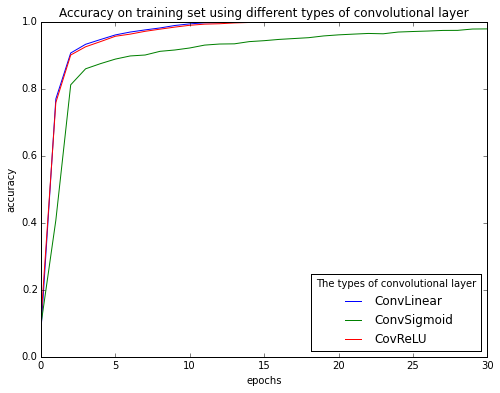

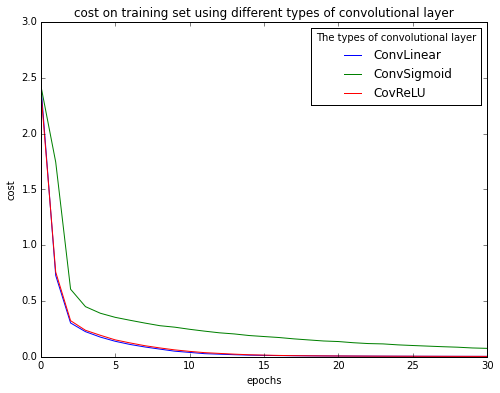

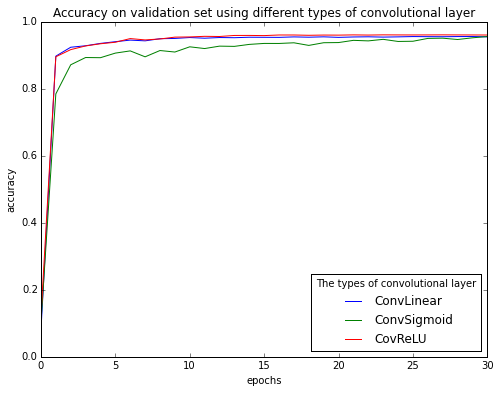

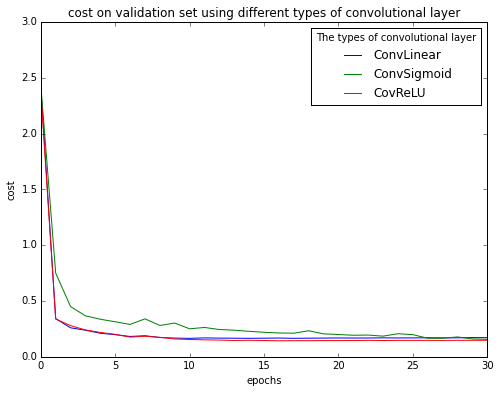

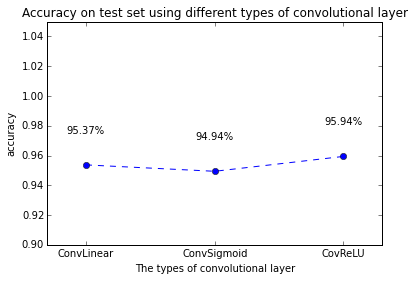

In [8]:
%matplotlib inline
import pylab as pl
import cPickle
with open('conv_layers_compare0113.pkl','r') as f:
    ac_test,y_t,y_v = cPickle.load(f)

max_epochs = 30
x = range(0,max_epochs+1)
legends = ['ConvLinear', 'ConvSigmoid', 'CovReLU']

# Plot value of the accuracy for training sets as a function of training epochs for each model
pl.figure(1,(8,6))
for i in range(len(legends)):
    pl.plot(x, y_t[i][1], linestyle="-", label = legends[i] )
    pl.title('Accuracy on training set using different types of convolutional layer')
    pl.xlabel('epochs')
    pl.ylabel('accuracy')
    pl.xlim(0,max_epochs)
    pl.ylim(0.0,1.0)
    pl.legend(title = 'The types of convolutional layer', loc='lower right')

# Plot cost for training sets as a function of training epochs for each model
pl.figure(2,(8,6))
for i in range(len(legends)):
    pl.plot(x, y_t[i][0], linestyle="-", label = legends[i] )
    pl.title('cost on training set using different types of convolutional layer')
    pl.xlabel('epochs')
    pl.ylabel('cost')
    pl.xlim(0,max_epochs)
    pl.ylim(0.0,3.0)
    pl.legend(title = 'The types of convolutional layer', loc='upper right')

# Plot value of the accuracy for validation sets as a function of training epochs for each model
pl.figure(3, (8,6))
for i in range(len(legends)):
    pl.plot(x, y_v[i][1], linestyle="-", label = legends[i] )
    pl.title('Accuracy on validation set using different types of convolutional layer')
    pl.xlabel('epochs')
    pl.ylabel('accuracy')
    pl.xlim(0,max_epochs)
    pl.ylim(0.0,1.0)
    pl.legend(title = 'The types of convolutional layer', loc='lower right')

# Plot value of the cost for validation sets as a function of training epochs for each model
pl.figure(4, (8,6))
for i in range(len(legends)):
    pl.plot(x, y_v[i][0], linestyle="-", label = legends[i] )
    pl.title('cost on validation set using different types of convolutional layer')
    pl.xlabel('epochs')
    pl.ylabel('cost')
    pl.xlim(0,max_epochs)
    pl.ylim(0.0,3.0)
    pl.legend(title = 'The types of convolutional layer', loc='upper right')

# Plot the test set classification accuracy against dropout schedulers
pl.figure(5)
x=range(len(ac_test))
pl.plot(x, ac_test, 'bo--')
pl.xlabel('The types of convolutional layer')
pl.ylabel('accuracy')
pl.xticks([0,1,2],legends)
pl.ylim(0.9,1.05)
pl.xlim(-0.3, 2.3)
pl.title('Accuracy on test set using different types of convolutional layer')
for i in range(3):
    pl.text(x[i], ac_test[i]+0.02, str(ac_test[i]*100)+'%', ha='center', va='bottom')
pl.show()

**Discussion**

According to the results of experiments above,  the model use convolutional layer with ReLU transfer functions performs the best while using Sigmoid transfer functions is the worst. Thus, I use ConvReLU layer in the later experiments.

**(2) Implement and test a convolutional network with 1 feature map.**

Use one convolutional+pooling layer. As a default use convolutional kernels of dimension 5x5 (stride 1) and pooling regions of 2x2. 

Ａccuray on test set: 95.38%

In [2]:
import numpy
import pylab as pl
import logging
from mlp.dataset import MNISTDataProvider
from mlp.conv import ConvLinear, ConvSigmoid, ConvReLU, ConvMaxPool2D
from mlp.layers import MLP, Linear, Sigmoid, Softmax #import required layer types
from mlp.optimisers import SGDOptimiser #import the optimiser

from mlp.costs import CECost #import the cost we want to use for optimisation
import mlp.schedulers as sd

logger = logging.getLogger()
logger.setLevel(logging.INFO)
# data information
max_num_batches = 1000
batch_size = 10
logger.info('Initialising data providers...')
train_dp = MNISTDataProvider(dset='train', batch_size=batch_size, max_num_batches=max_num_batches, randomize=True)
valid_dp = MNISTDataProvider(dset='valid', batch_size=10000, max_num_batches=-10, randomize=False)
test_dp = MNISTDataProvider(dset='eval', batch_size=10000, max_num_batches=-10, randomize=False)

rng = numpy.random.RandomState([2015,10,10])
max_epochs = 30
cost = CECost()
learning_rate=0.2

model = MLP(cost=cost)
model.add_layer(ConvSigmoid(1,1))
model.add_layer(ConvMaxPool2D(1,conv_shape=(24,24)))
model.add_layer(Sigmoid(idim=144, odim=200, irange=0.2, rng=rng))
model.add_layer(Softmax(idim=200, odim=10, rng=rng))

lr_scheduler=sd.LearningRateFixed(learning_rate=learning_rate, max_epochs=max_epochs)
optimiser = SGDOptimiser(lr_scheduler=lr_scheduler, dp_scheduler=None)

#train and test model
logger.info('Training started...')
tr_stats, valid_stats = optimiser.train(model, train_dp, valid_dp)
tst_cost, tst_accuracy = optimiser.validate(model, test_dp)
logger.info('MNIST test set accuracy is %.2f %%, cost (%s) is %.3f'%(tst_accuracy*100., cost.get_name(), tst_cost))


INFO:root:Initialising data providers...
INFO:root:Training started...
INFO:mlp.optimisers:Epoch 0: Training cost (ce) for initial model is 2.350. Accuracy is 9.77%
INFO:mlp.optimisers:Epoch 0: Validation cost (ce) for initial model is 2.350. Accuracy is 10.09%
INFO:mlp.optimisers:Epoch 1: Training cost (ce) is 1.047. Accuracy is 65.43%
INFO:mlp.optimisers:Epoch 1: Validation cost (ce) is 0.432. Accuracy is 86.66%
INFO:mlp.optimisers:Epoch 1: Took 97 seconds. Training speed 160 pps. Validation speed 294 pps.
INFO:mlp.optimisers:Epoch 2: Training cost (ce) is 0.438. Accuracy is 85.84%
INFO:mlp.optimisers:Epoch 2: Validation cost (ce) is 0.352. Accuracy is 88.81%
INFO:mlp.optimisers:Epoch 2: Took 96 seconds. Training speed 162 pps. Validation speed 297 pps.
INFO:mlp.optimisers:Epoch 3: Training cost (ce) is 0.367. Accuracy is 88.50%
INFO:mlp.optimisers:Epoch 3: Validation cost (ce) is 0.339. Accuracy is 89.37%
INFO:mlp.optimisers:Epoch 3: Took 96 seconds. Training speed 162 pps. Validati

**(3) Implement and test a convolutional network with 5 feature map.**

Use one convolutional+pooling layer. As a default use convolutional kernels of dimension 5x5 (stride 1) and pooling regions of 2x2. 

Accuracy on test set: 96.96%

In [3]:
import numpy
import pylab as pl
import logging
from mlp.dataset import MNISTDataProvider
from mlp.conv import ConvLinear, ConvSigmoid, ConvReLU, ConvMaxPool2D
from mlp.layers import MLP, Linear, Sigmoid, Softmax #import required layer types
from mlp.optimisers import SGDOptimiser #import the optimiser

from mlp.costs import CECost #import the cost we want to use for optimisation
import mlp.schedulers as sd

logger = logging.getLogger()
logger.setLevel(logging.INFO)
# data information
max_num_batches = 1000
batch_size = 10
logger.info('Initialising data providers...')
train_dp = MNISTDataProvider(dset='train', batch_size=batch_size, max_num_batches=max_num_batches, randomize=True)
valid_dp = MNISTDataProvider(dset='valid', batch_size=10000, max_num_batches=-10, randomize=False)
test_dp = MNISTDataProvider(dset='eval', batch_size=10000, max_num_batches=-10, randomize=False)

rng = numpy.random.RandomState([2015,10,10])
max_epochs = 30
cost = CECost()
learning_rate=0.1

model = MLP(cost=cost)
model.add_layer(ConvReLU(1,5))
model.add_layer(ConvMaxPool2D(5,conv_shape=(24,24)))
model.add_layer(Sigmoid(idim=720, odim=300, irange=0.2, rng=rng))
model.add_layer(Softmax(idim=300, odim=10, rng=rng))

lr_scheduler=sd.LearningRateFixed(learning_rate=learning_rate, max_epochs=max_epochs)
optimiser = SGDOptimiser(lr_scheduler=lr_scheduler, dp_scheduler=None)

#train and test model
logger.info('Training started...')
tr_stats, valid_stats = optimiser.train(model, train_dp, valid_dp)
tst_cost, tst_accuracy = optimiser.validate(model, test_dp)
logger.info('MNIST test set accuracy is %.2f %%, cost (%s) is %.3f'%(tst_accuracy*100., cost.get_name(), tst_cost))


INFO:root:Initialising data providers...
INFO:root:Training started...
INFO:mlp.optimisers:Epoch 0: Training cost (ce) for initial model is 2.412. Accuracy is 9.25%
INFO:mlp.optimisers:Epoch 0: Validation cost (ce) for initial model is 2.413. Accuracy is 8.83%
INFO:mlp.optimisers:Epoch 1: Training cost (ce) is 0.501. Accuracy is 83.68%
INFO:mlp.optimisers:Epoch 1: Validation cost (ce) is 0.254. Accuracy is 92.49%
INFO:mlp.optimisers:Epoch 1: Took 312 seconds. Training speed 45 pps. Validation speed 113 pps.
INFO:mlp.optimisers:Epoch 2: Training cost (ce) is 0.240. Accuracy is 92.43%
INFO:mlp.optimisers:Epoch 2: Validation cost (ce) is 0.201. Accuracy is 93.95%
INFO:mlp.optimisers:Epoch 2: Took 312 seconds. Training speed 45 pps. Validation speed 112 pps.
INFO:mlp.optimisers:Epoch 3: Training cost (ce) is 0.173. Accuracy is 94.39%
INFO:mlp.optimisers:Epoch 3: Validation cost (ce) is 0.187. Accuracy is 94.31%
INFO:mlp.optimisers:Epoch 3: Took 313 seconds. Training speed 45 pps. Validatio

**Disscussion**: This model performs much better than the previous one. That is because it kept more features through 5 feature maps.

**(4) Explore convolutional networks with two convolutional layers**

Implementing a network with two convolutional+maxpooling layers with 5 feature maps in the first convolutional layer, and 10 feature maps in the second convolutional layer.

Accuracy on test set: 98.04%

In [1]:
import numpy
import pylab as pl
import logging
from mlp.dataset import MNISTDataProvider
from mlp.conv import ConvLinear, ConvSigmoid, ConvReLU, ConvMaxPool2D
from mlp.layers import MLP, Linear, Sigmoid, Softmax #import required layer types
from mlp.optimisers import SGDOptimiser #import the optimiser

from mlp.costs import CECost #import the cost we want to use for optimisation
import mlp.schedulers as sd

logger = logging.getLogger()
logger.setLevel(logging.INFO)
# data information
max_num_batches = 1000
batch_size = 10
logger.info('Initialising data providers...')
train_dp = MNISTDataProvider(dset='train', batch_size=batch_size, max_num_batches=max_num_batches, randomize=True)
valid_dp = MNISTDataProvider(dset='valid', batch_size=10000, max_num_batches=-10, randomize=False)
test_dp = MNISTDataProvider(dset='eval', batch_size=10000, max_num_batches=-10, randomize=False)

rng = numpy.random.RandomState([2015,10,10])
max_epochs = 30
cost = CECost()
learning_rate=0.05

model = MLP(cost=cost)
model.add_layer(ConvReLU(1,5))
model.add_layer(ConvMaxPool2D(5,conv_shape=(24,24)))
model.add_layer(ConvReLU(5,10,kernel_shape=(3,3)))
model.add_layer(ConvMaxPool2D(10,conv_shape=(10,10)))
model.add_layer(Sigmoid(idim=250, odim=200, irange=0.2, rng=rng))
model.add_layer(Softmax(idim=200, odim=10, rng=rng))

lr_scheduler=sd.LearningRateFixed(learning_rate=learning_rate, max_epochs=max_epochs)
optimiser = SGDOptimiser(lr_scheduler=lr_scheduler, dp_scheduler=None)

#train and test model
logger.info('Training started...')
tr_stats, valid_stats = optimiser.train(model, train_dp, valid_dp)
tst_cost, tst_accuracy = optimiser.validate(model, test_dp)
logger.info('MNIST test set accuracy is %.2f %%, cost (%s) is %.3f'%(tst_accuracy*100., cost.get_name(), tst_cost))


INFO:root:Initialising data providers...
INFO:root:Training started...
INFO:mlp.optimisers:Epoch 0: Training cost (ce) for initial model is 2.352. Accuracy is 9.79%
INFO:mlp.optimisers:Epoch 0: Validation cost (ce) for initial model is 2.350. Accuracy is 10.30%
INFO:mlp.optimisers:Epoch 1: Training cost (ce) is 0.703. Accuracy is 78.04%
INFO:mlp.optimisers:Epoch 1: Validation cost (ce) is 0.279. Accuracy is 92.15%
INFO:mlp.optimisers:Epoch 1: Took 247 seconds. Training speed 56 pps. Validation speed 147 pps.
INFO:mlp.optimisers:Epoch 2: Training cost (ce) is 0.226. Accuracy is 93.25%
INFO:mlp.optimisers:Epoch 2: Validation cost (ce) is 0.152. Accuracy is 95.59%
INFO:mlp.optimisers:Epoch 2: Took 245 seconds. Training speed 56 pps. Validation speed 147 pps.
INFO:mlp.optimisers:Epoch 3: Training cost (ce) is 0.141. Accuracy is 95.91%
INFO:mlp.optimisers:Epoch 3: Validation cost (ce) is 0.118. Accuracy is 96.85%
INFO:mlp.optimisers:Epoch 3: Took 248 seconds. Training speed 56 pps. Validati

** Discussion **:
The accuracy on test set of this model is higher than the previous one using 5 feature maps and one convolutional layer. This model is more complicated and stronger.

**(5) Experiments on convolutional network with different number of feature maps.**

Train and test the model using 1, 5 and 10 feature maps. Compare their performance.


In [5]:
import numpy
import pylab as pl
import logging
from mlp.dataset import MNISTDataProvider
from mlp.conv import ConvLinear, ConvSigmoid, ConvReLU, ConvMaxPool2D
from mlp.layers import MLP, Linear, Sigmoid, Softmax #import required layer types
from mlp.optimisers import SGDOptimiser #import the optimiser

from mlp.costs import CECost #import the cost we want to use for optimisation
import mlp.schedulers as sd

logger = logging.getLogger()
logger.setLevel(logging.INFO)
# data information
max_num_batches = 500
batch_size = 10
logger.info('Initialising data providers...')
train_dp = MNISTDataProvider(dset='train', batch_size=batch_size, max_num_batches=max_num_batches, randomize=True)
valid_dp = MNISTDataProvider(dset='valid', batch_size=10000, max_num_batches=-10, randomize=False)
test_dp = MNISTDataProvider(dset='eval', batch_size=10000, max_num_batches=-10, randomize=False)

rng = numpy.random.RandomState([2015,10,10])
max_epochs = 30
cost = CECost()
learning_rate=0.1

num_feature_maps = [1,5,10]

y_t = []      # Accuracy and cost on training set
y_v = []      # Accuracy and cost on validation set
ac_test=[]    # Accuracy and cost on test set
for i in range(len(num_feature_maps)):
    valid_dp.reset()
    test_dp.reset()
    
    model = MLP(cost=cost)
    model.add_layer(ConvReLU(1,num_feature_maps[i]))
    model.add_layer(ConvMaxPool2D(num_feature_maps[i],conv_shape=(24,24)))
    model.add_layer(Sigmoid(idim=144*num_feature_maps[i], odim=200, irange=0.2, rng=rng))
    model.add_layer(Softmax(idim=200, odim=10, rng=rng))

    lr_scheduler=sd.LearningRateFixed(learning_rate=learning_rate, max_epochs=max_epochs)
    optimiser = SGDOptimiser(lr_scheduler=lr_scheduler, dp_scheduler=None)

    #train and test model
    logger.info('Training started...')
    tr_stats, valid_stats = optimiser.train(model, train_dp, valid_dp)
    tst_cost, tst_accuracy = optimiser.validate(model, test_dp)
    logger.info('MNIST test set accuracy is %.2f %%, cost (%s) is %.3f'%(tst_accuracy*100., cost.get_name(), tst_cost))

    # store results
    ac_test.append(tst_accuracy)
    y_t.append([])            # Append an empty list for storing cost and accuracy of each training epoch
    y_t[i].append([])
    y_t[i].append([])
    y_v.append([])            # Append an empty list for storing cost and accuracy of validation for each epoch
    y_v[i].append([])
    y_v[i].append([])
    for j in range(0,max_epochs+1):
        y_t[i][0].append(tr_stats[j][0])       # get cost in each epoch
        y_v[i][0].append(valid_stats[j][0])
        
        y_t[i][1].append(tr_stats[j][1])       # get accuracy in each epoch
        y_v[i][1].append(valid_stats[j][1]) 
        

import cPickle
with open('conv_numfeat_compare1.pkl','wb') as f:
    cPickle.dump([ac_test,y_t,y_v], f)

INFO:root:Initialising data providers...
INFO:root:Training started...
INFO:mlp.optimisers:Epoch 0: Training cost (ce) for initial model is 2.338. Accuracy is 9.88%
INFO:mlp.optimisers:Epoch 0: Validation cost (ce) for initial model is 2.337. Accuracy is 9.83%
INFO:mlp.optimisers:Epoch 1: Training cost (ce) is 1.066. Accuracy is 64.86%
INFO:mlp.optimisers:Epoch 1: Validation cost (ce) is 0.346. Accuracy is 90.29%
INFO:mlp.optimisers:Epoch 1: Took 45 seconds. Training speed 226 pps. Validation speed 434 pps.
INFO:mlp.optimisers:Epoch 2: Training cost (ce) is 0.336. Accuracy is 89.76%
INFO:mlp.optimisers:Epoch 2: Validation cost (ce) is 0.289. Accuracy is 91.27%
INFO:mlp.optimisers:Epoch 2: Took 44 seconds. Training speed 230 pps. Validation speed 444 pps.
INFO:mlp.optimisers:Epoch 3: Training cost (ce) is 0.259. Accuracy is 91.96%
INFO:mlp.optimisers:Epoch 3: Validation cost (ce) is 0.251. Accuracy is 92.56%
INFO:mlp.optimisers:Epoch 3: Took 44 seconds. Training speed 230 pps. Validatio

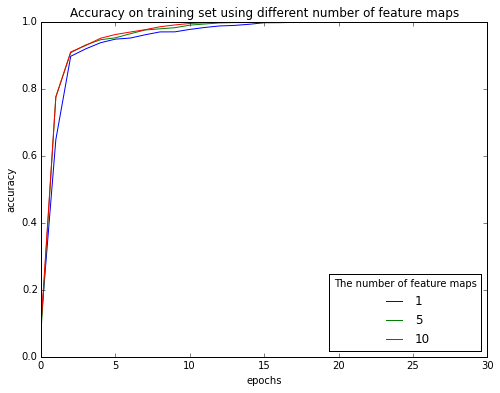

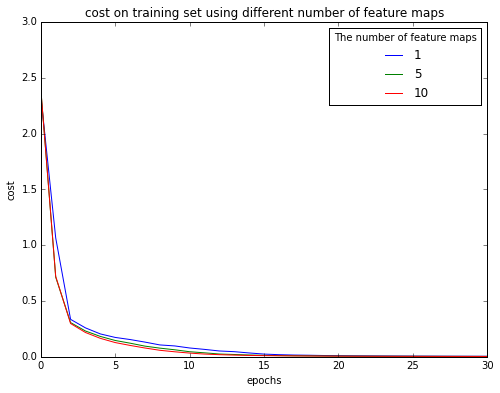

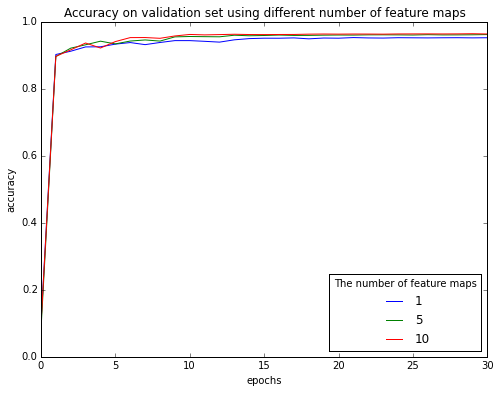

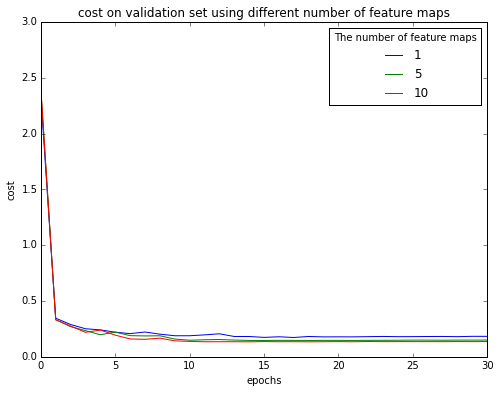

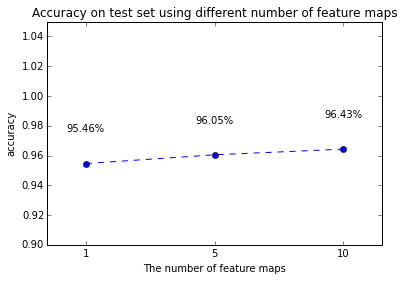

In [9]:
%matplotlib inline
import pylab as pl
import cPickle
with open('conv_numfeat_compare1.pkl','r') as f:
    ac_test,y_t,y_v = cPickle.load(f)

max_epochs = 30
x = range(0,max_epochs+1)
legends = ['1', '5', '10']

# Plot value of the accuracy for training sets as a function of training epochs for each model
pl.figure(1,(8,6))
for i in range(len(legends)):
    pl.plot(x, y_t[i][1], linestyle="-", label = legends[i] )
    pl.title('Accuracy on training set using different number of feature maps')
    pl.xlabel('epochs')
    pl.ylabel('accuracy')
    pl.xlim(0,max_epochs)
    pl.ylim(0.0,1.0)
    pl.legend(title = 'The number of feature maps', loc='lower right')

# Plot cost for training sets as a function of training epochs for each model
pl.figure(2,(8,6))
for i in range(len(legends)):
    pl.plot(x, y_t[i][0], linestyle="-", label = legends[i] )
    pl.title('cost on training set using different number of feature maps')
    pl.xlabel('epochs')
    pl.ylabel('cost')
    pl.xlim(0,max_epochs)
    pl.ylim(0.0,3.0)
    pl.legend(title = 'The number of feature maps', loc='upper right')

# Plot value of the accuracy for validation sets as a function of training epochs for each model
pl.figure(3, (8,6))
for i in range(len(legends)):
    pl.plot(x, y_v[i][1], linestyle="-", label = legends[i] )
    pl.title('Accuracy on validation set using different number of feature maps')
    pl.xlabel('epochs')
    pl.ylabel('accuracy')
    pl.xlim(0,max_epochs)
    pl.ylim(0.0,1.0)
    pl.legend(title = 'The number of feature maps', loc='lower right')

# Plot value of the cost for validation sets as a function of training epochs for each model
pl.figure(4, (8,6))
for i in range(len(legends)):
    pl.plot(x, y_v[i][0], linestyle="-", label = legends[i] )
    pl.title('cost on validation set using different number of feature maps')
    pl.xlabel('epochs')
    pl.ylabel('cost')
    pl.xlim(0,max_epochs)
    pl.ylim(0.0,3.0)
    pl.legend(title = 'The number of feature maps', loc='upper right')

# Plot the test set classification accuracy against dropout schedulers
pl.figure(5)
x=range(len(ac_test))
pl.plot(x, ac_test, 'bo--')
pl.xlabel('The number of feature maps')
pl.ylabel('accuracy')
pl.xticks([0,1,2],legends)
pl.ylim(0.9,1.05)
pl.xlim(-0.3, 2.3)
pl.title('Accuracy on test set using different number of feature maps')
for i in range(3):
    pl.text(x[i], ac_test[i]+0.02, str(ac_test[i]*100)+'%', ha='center', va='bottom')
pl.show()

**Discussion**:

This experiment are base on convolutional networks with one ConvReLU layer, one Maxpooling layer and one fully connected layer, using 1, 5 and 10 feature maps respectively.

The last graph above shows that model with more feature maps has better performance of accuracy on test set. That is beacuse the model keep and learn much more features from data.

**This is the end of coursework 2.**

Please remember to save your notebook, and submit your notebook following the instructions at the top.  Please make sure that you have executed all the code cells when you submit the notebook.
